# POTJERA


Potjera je kviz u produkciji HRT-a po licenci britanskog kviza The Chase.
Trenutni voditelj kviza je Joško Lokas.

### Pravila kviza

U igri sudjeluje četvero natjecatelja koji se međusobno ne poznaju, no da bi osvojili nagradu moraju igrati kao tim. Cilj je pobijediti lovca i tako osvojiti novčanu nagradu.

Igra se sastoji od četiri glavna dijela:

#### Pojedinačna igra
- svaki natjecatelj odgovara na pitanja voditelja kviza za osvajanje iznosa u svrhu pojedinačne igre protiv lovca
- vremensko trajanje je 1 minuta
- svaki točan odgovor donosi natjecatelju **3 500** kuna



#### Pojedinačne igre svakog natjecatelja protiv lovca
- natjecatelj odabire iznos između osvojenih novaca u pojedinačnoj igri te više ili niže ponude
- nakon odluke ovisno o svom odabiru natjecatelj će biti: *_četiri_* koraka ispred lovca za odabranu nižu ponudu, *_tri_* koraka ispred lovca za odabir osvojenog iznosa u pojedinačnoj igri pitanja, *_dva_* koraka ispred lovca za odabranu višu ponudu
- nakon toga igrač mora na "ploči potjere" odgovarati na pitanja uz pomoć ponuđenih A - B - C odgovora, u neodređenom vremenu, ali uz mogućnost davanja odgovora u roku **5 sekundi** nakon što je lovac odgovorio, ukoliko ne odgovori pravilo je kao da je natjecatelj dao neispravan odgovor.
- ako lovac sustigne natjecatelja prije kraja igre natjecatelj ispada iz tima i osvaja 0 kuna, u protivnom donosi timu odabrani iznos novaca i sudjeluje u zajedničkoj igri natjecatelja

#### Zajedničke igre natjecatelja

- sastoji se od natjecatelja koji su ušli u završnu potjeru odnosno pobjedili lovca u pojedinačnoj igri
- natjecatelji odgovaraju na pitanja voditelja kviza i pokušavaju dati što veći broj odgovora u **120 sekundi**
- natjecatelji se javljaju za odgovor na pitanja, ukoliko jedan ponudi krivi odgovor drugi natjecatelji ne mogu ponuditi novi odgovor na zadano pitanje
- svaki točan odgovor računa se kao jedan korak
- ako jedan igrač sudjeluje u završnoj potjeri onda ima već jedan početni korak prednosti, a ako sva četiri igrača sudjeluju u završnoj potjeri, tada imaju početna četiri koraka prednosti


#### Završne potjere lovca
- lovac u 120 sekundi lovi broj točnih odgovora natjecatelja kviza u njihovoj završnoj potjeri
- za svaki krivi odgovor lovca vrijeme se zaustavlja i natjecatelji imaju priliku ponuditi točan odgovor čime udaljavaju lovca za jedan korak od cilja
- ako vrijeme istekne i lovac nije sustigao broj točnih odgovora natjecatelja oni osvajaju ukupan novac koji se
sastoji od zbroja svih iznosa iz pojedinačne igre protiv lovca onih igrača koji su pobjedili lovca te se dijeli na jednake dijelove među igračima
- u slučaju da lovac uspije stići do broja odgovora natjecatelja završne potjere u zadanom vremenu, lovac je uhvatio ekipu te ekipa ne osvaja ništa


In [141]:
import numbers
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import openpyxl

## Eksploratorna analiza podatkovnog skupa

Podatci iz excel file-a **potjera_sređeno_v3.xlsx** se učitavaju pomoću Pandas biblioteke u varijablu **data**.

In [142]:
data = pd.read_excel('potjera_sređeno_v3.xlsx')
data.head()

,SEZONA,EPIZODA,LOVAC,PLOCA1,PLOCA2,PLOCA3,PLOCA4,NOVAC,EKIPA_BR,EKIPA_REZ,LOVAC_REZ,VRIJEME,POBJEDNIK,LOVAC_POBJEDA
0,1,1,Dean Kotiga,Izgubio,35000,10000,Izgubio,45000.0,2.0,14.0,14.0,10.0,LOVAC,1
1,1,2,Morana Zibar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EKIPA,0
2,1,3,Dean Kotiga,NaN,NaN,Izgubio,Izgubio,3500.0,2.0,9.0,9.0,1.0,LOVAC,1
3,1,4,Mirko Miočić,NaN,NaN,Izgubio,NaN,NaN,NaN,NaN,NaN,NaN,EKIPA,0
4,1,5,Mirko Miočić,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EKIPA,0


Broj redaka i stupaca podatkovnog skupa iznosi:

In [143]:
data.shape

(941, 14)

In [144]:
duplicate_rows_df = data[data.duplicated()]
print('Broj istih redaka: ', duplicate_rows_df.shape)

Broj istih redaka:  (0, 14)


Stupci podatkovnog skupa su  redom:

In [145]:
list(data.columns)

['SEZONA',
 'EPIZODA',
 'LOVAC',
 'PLOCA1',
 'PLOCA2',
 'PLOCA3',
 'PLOCA4',
 'NOVAC',
 'EKIPA_BR',
 'EKIPA_REZ',
 'LOVAC_REZ',
 'VRIJEME',
 'POBJEDNIK',
 'LOVAC_POBJEDA']

Podatkovni tip pojedninog stupca je:

In [146]:
data.dtypes

SEZONA             int64
EPIZODA            int64
LOVAC             object
PLOCA1            object
PLOCA2            object
PLOCA3            object
PLOCA4            object
NOVAC            float64
EKIPA_BR         float64
EKIPA_REZ        float64
LOVAC_REZ        float64
VRIJEME          float64
POBJEDNIK         object
LOVAC_POBJEDA      int64
dtype: object

Stupac **SEZONA** označava u kojoj se sezoni igra odvijala. Detaljnom statističkom analizom stupca vidimo da su u svim redovima podatci o sezoni sadržani. Također da je najmanja vrijednost 1, a najveća 7 što označava da su podatci iz prvih sedam sezona.

In [147]:
data['SEZONA'].describe()

count    941.000000
mean       4.170032
std        1.823836
min        1.000000
25%        3.000000
50%        4.000000
75%        6.000000
max        7.000000
Name: SEZONA, dtype: float64

Najviše je podataka iz 2 sezone točnije njih 159. Na histogramu se može lako uočiti da prva sezona sa 61 epizoda jako odskače u broju od ostalih sezona.

2    159
6    157
4    151
3    149
5    148
7    116
1     61
Name: SEZONA, dtype: int64

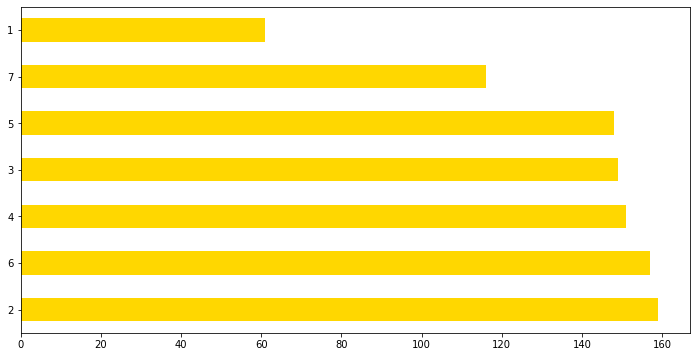

In [148]:
plt.subplots(figsize=(12,6))
sezone_vrijednosti = data['SEZONA'].value_counts()
sezone_vrijednosti.plot(kind='barh',color='gold', label='sezone')
sezone_vrijednosti

Analizom podataka o epizodama uočava se da je najveća vrijednost 942, a da je ukupan broj epizoda u podatkovnom skupu 941 odnosno da podatak o jednoj epizodi nedostaje.

In [149]:
data['EPIZODA'].describe()

count    941.000000
mean     471.222104
std      272.087166
min        1.000000
25%      236.000000
50%      471.000000
75%      706.000000
max      942.000000
Name: EPIZODA, dtype: float64

Ako se zbroju brojeva od 1 do 942 oduzme zboj epizoda u podatkovnom skupu dobije se vrijednost epizode koja nedostaje,
 a to je epizoda 733. Taj nam podatak ujedno govori da se podatkovni skup ne sastoji od nasumično odabranih epizoda.

In [150]:
sum(range(1, 942 + 1))-data['EPIZODA'].sum()

733

Ako se ispita sezona epizode koja je neposredno prije nedostajeće 733. epizode i neposredno poslije može se zaključiti da i 733. epizoda pripada 6. sezoni.

In [151]:
data[data['EPIZODA']==732]["SEZONA"]

731    6
Name: SEZONA, dtype: int64

In [152]:
data[data['EPIZODA']==734]["SEZONA"]

732    6
Name: SEZONA, dtype: int64

Lovci koji su sudjelovali u prvih 7 sezona su: Dean Kotiga, Morana Zibar, Mirko Miočić, Krešimir Sučević-Međeral i Mladen Vukorepa.

In [153]:
list(data['LOVAC'].unique())

['Dean Kotiga',
 'Morana Zibar',
 'Mirko Miočić',
 'Krešimir Sučević-Međeral',
 'Mladen Vukorepa']

U najviše epizoda sudjelovali su Morana Zibar s 281 odrađenom epizodom i Dean Kotiga s 278 epizoda.

Morana Zibar                281
Dean Kotiga                 278
Krešimir Sučević-Međeral    174
Mirko Miočić                113
Mladen Vukorepa              95
Name: LOVAC, dtype: int64

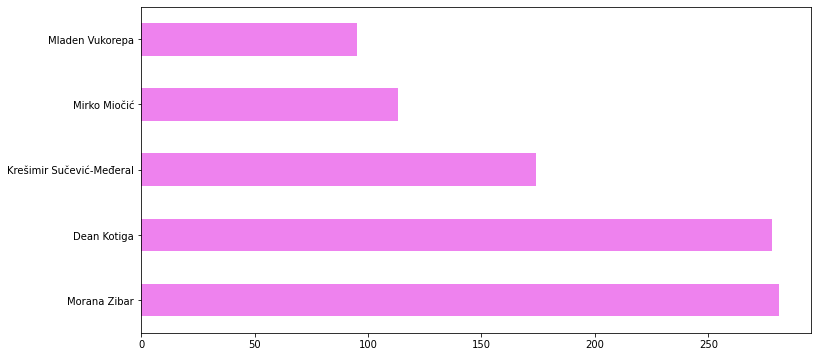

In [154]:
plt.subplots(figsize=(12,6))
lovac_vrijednosti = data['LOVAC'].value_counts()
lovac_vrijednosti.plot(kind='barh',color='violet', label='lovci')
lovac_vrijednosti

Gledajući po udjelu zastupljenosti Dean i Morana su sudjelovali u gotovo dvije trećine svih epizoda. Neravnomjernost
sudjelovanja lovca pokušat će se objasniti kroz analizu epizoda po sezonama.

Text(0.5, 1.0, 'Udio sudjelovanja lovaca kroz epizode u svim sezonama.')

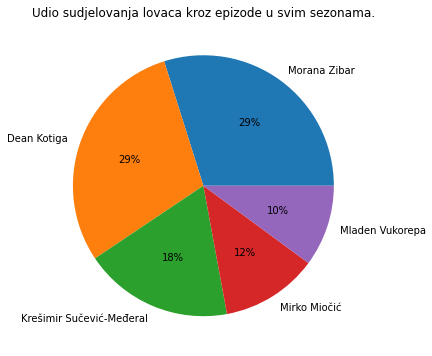

In [155]:
plt.subplots(figsize=(6,6))
labels=data['LOVAC'].value_counts().index.tolist()
plt.pie(data['LOVAC'].value_counts(),labels=labels,autopct='%i%%')
plt.title(f'Udio sudjelovanja lovaca kroz epizode u svim sezonama.')

Analizom sudjelovanja lovaca po sezonama zaključuje se da su samo Morana i Dean bili prisuti u svim sezonama. Krešimir se pridružio potjeri od 3. sezone, Mirko od 3. sezone ne lovi, a Mladen se pridružuje od 5. sezone.

Text(0.5, 1.0, 'Sudjelovanje Morane u sezonama')

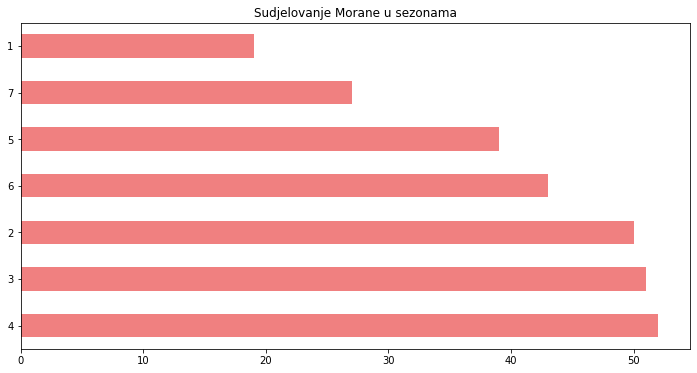

In [156]:
plt.subplots(figsize=(12,6))
data[data['LOVAC']=="Morana Zibar"]['SEZONA'].value_counts().plot(kind='barh',color='lightcoral', label='Morana')
plt.title("Sudjelovanje Morane u sezonama")

Text(0.5, 1.0, 'Sudjelovanje Deana u sezonama')

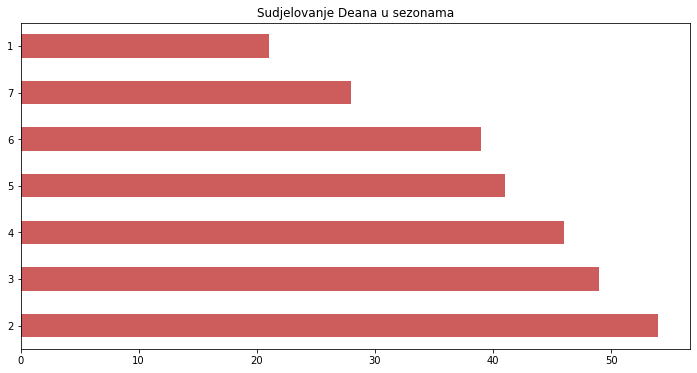

In [157]:
plt.subplots(figsize=(12,6))
data[data['LOVAC']=="Dean Kotiga"]['SEZONA'].value_counts().plot(kind='barh',color='indianred', label='sezone')
plt.title("Sudjelovanje Deana u sezonama")

Text(0.5, 1.0, 'Sudjelovanje Krešimira u sezonama')

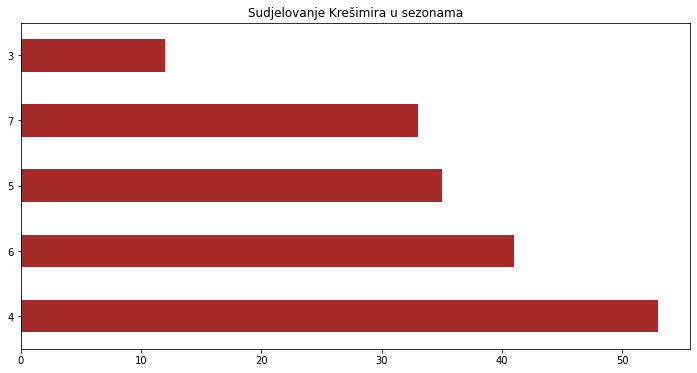

In [158]:
plt.subplots(figsize=(12,6))
data[data['LOVAC']=="Krešimir Sučević-Međeral"]['SEZONA'].value_counts().plot(kind='barh',color='brown', label='sezone')
plt.title("Sudjelovanje Krešimira u sezonama")

Text(0.5, 1.0, 'Sudjelovanje Mirka u sezonama')

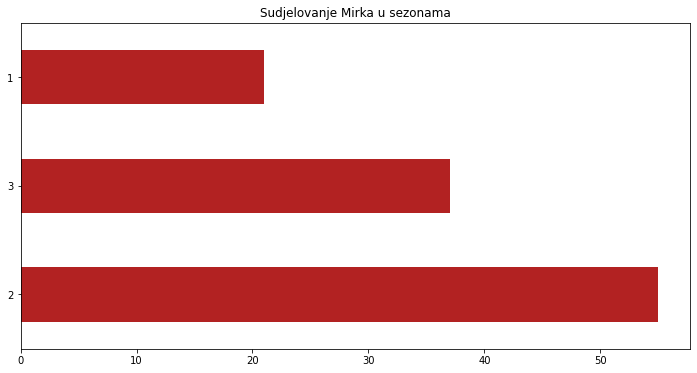

In [159]:
plt.subplots(figsize=(12,6))
data[data['LOVAC']=="Mirko Miočić"]['SEZONA'].value_counts().plot(kind='barh',color='firebrick', label='sezone')
plt.title("Sudjelovanje Mirka u sezonama")

Text(0.5, 1.0, 'Sudjelovanje Mladena u sezonama')

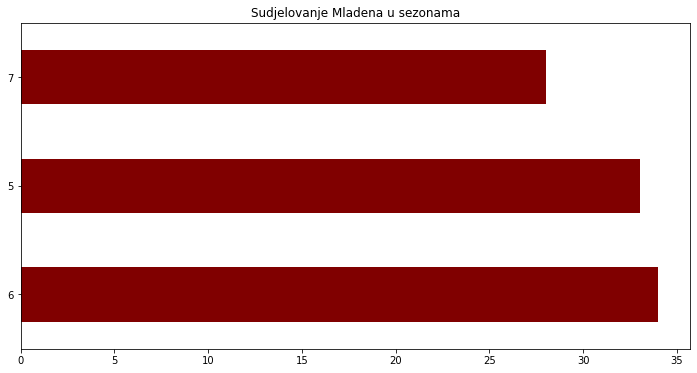

In [160]:
plt.subplots(figsize=(12,6))
data[data['LOVAC']=="Mladen Vukorepa"]['SEZONA'].value_counts().plot(kind='barh',color='maroon', label='sezone')
plt.title("Sudjelovanje Mladena u sezonama")

Napravljen je novi podatkovni skup **lovci_po_sezonama** koji sadrži vrijednosti u kojoj sezoni je koji lovac sudjelovao puta kako bi se moglo usporediti
preferira li produkcija određenog lovca, odonosno sudjeluje li neki lovac značajno više od ostalih. **NaN** vrijednosti u podatkovnom
skupu označavaju da lovac nije sudjelovao u toj sezoni te je ta vrijednost zamjenjena s nulom.

In [161]:
morana = pd.DataFrame(data[data['LOVAC']=="Morana Zibar"]['SEZONA'].value_counts().reset_index().values, columns=["SEZONA", "MORANA"])
dean = pd.DataFrame(data[data['LOVAC']=="Dean Kotiga"]['SEZONA'].value_counts().reset_index().values, columns=["SEZONA", "DEAN"])
kresimir = pd.DataFrame(data[data['LOVAC']=="Krešimir Sučević-Međeral"]['SEZONA'].value_counts().reset_index().values, columns=["SEZONA", "KRESIMIR"])
mirko = pd.DataFrame(data[data['LOVAC']=="Mirko Miočić"]['SEZONA'].value_counts().reset_index().values, columns=["SEZONA", "MIRKO"])
mladen = pd.DataFrame(data[data['LOVAC']=="Mladen Vukorepa"]['SEZONA'].value_counts().reset_index().values, columns=["SEZONA", "MLADEN"])

In [162]:
lovci_po_sezonama=dean.merge(morana, on='SEZONA', how='left')
lovci_po_sezonama=lovci_po_sezonama.merge(kresimir, on='SEZONA', how='left')
lovci_po_sezonama=lovci_po_sezonama.merge(mirko, on='SEZONA', how='left')
lovci_po_sezonama=lovci_po_sezonama.merge(mladen, on='SEZONA', how='left')
lovci_po_sezonama=lovci_po_sezonama.fillna(0)
lovci_po_sezonama= lovci_po_sezonama.astype(int)
lovci_po_sezonama=lovci_po_sezonama.sort_values(by=['SEZONA'])
lovci_po_sezonama

,SEZONA,DEAN,MORANA,KRESIMIR,MIRKO,MLADEN
6,1,21,19,0,21,0
0,2,54,50,0,55,0
1,3,49,51,12,37,0
2,4,46,52,53,0,0
3,5,41,39,35,0,33
4,6,39,43,41,0,34
5,7,28,27,33,0,28


Odnos sudjelovanja po sezonama grafički se može prikazati stupčastim dijagramom gdje pojedina boja odgovara pojedinom lovcu.

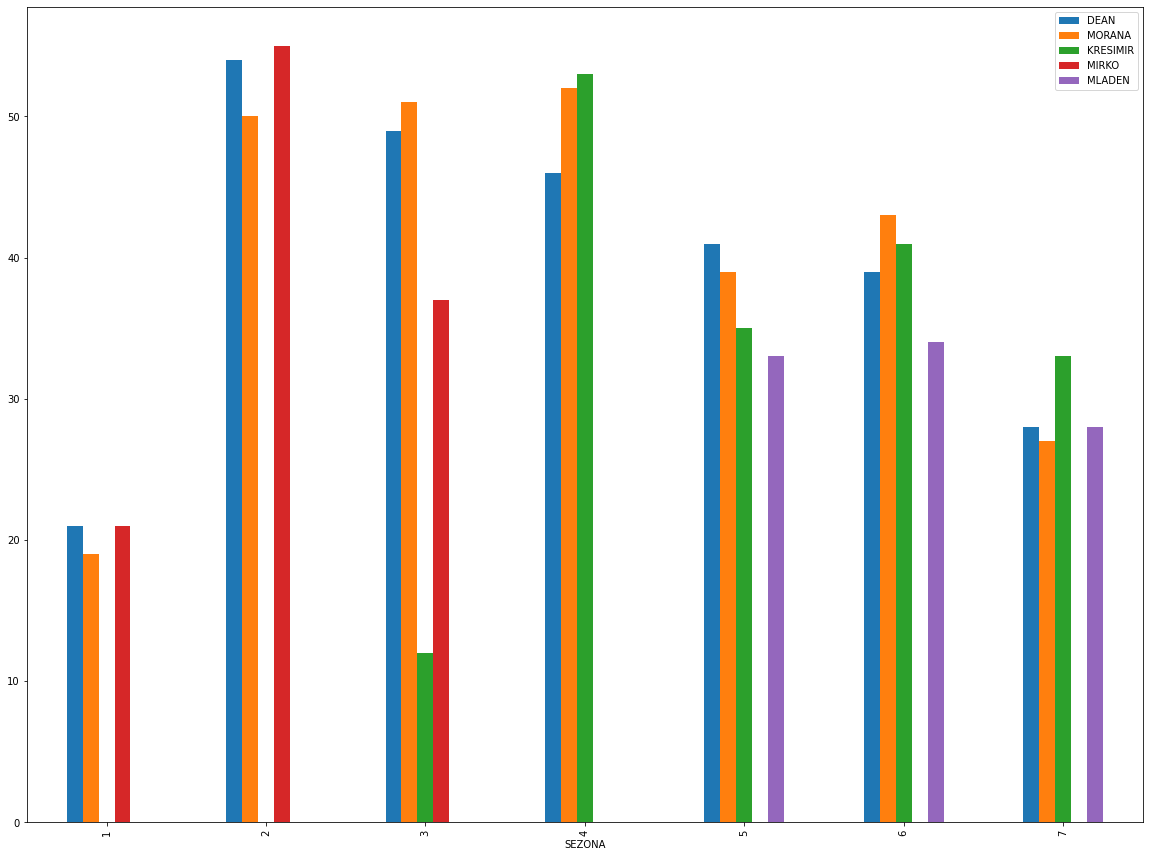

In [163]:
plt.rcParams["figure.figsize"] = (20,15)
lovci_po_sezonama.set_index('SEZONA').plot(kind='bar')
plt.rcParams["figure.figsize"] = (6,6)


U stupčastom dijagramu vidljive su nejednakosti u sudjelovanju lovaca. Bolju predodžbu nejednakosti prikazuje strukturni
krug s postotkom sudjelovanja. U svim sezonama osim treće sudjelovanja lovaca su gotovo podjednaka. U trećoj sezoni Krešimir
sudjeluje u samo 8% epizoda, dok Morana i Dean preko 30%. Ta nejednakost vidljiva je i na stupčastom dijagramu. Isto
tako vidljivo je da je baš Krešimir najčešći lovac u 4. i 7. sezoni.

In [164]:
def udio_igre_lovaca_po_sezoni(x):
    labels=data[data['SEZONA']==x]['LOVAC'].value_counts().index.tolist()
    plt.pie(data[data['SEZONA']==x]['LOVAC'].value_counts(),labels=labels,autopct='%i%%')
    plt.title(f'Udio sudjelovanja lovaca u {x}. sezoni.')

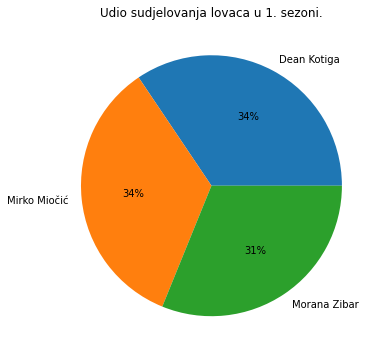

In [165]:
udio_igre_lovaca_po_sezoni(1)

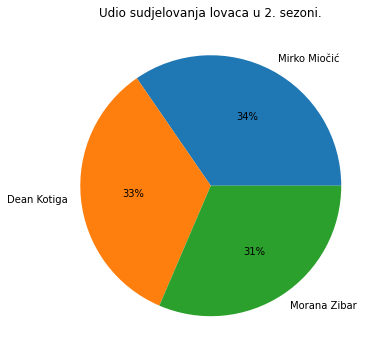

In [166]:
udio_igre_lovaca_po_sezoni(2)

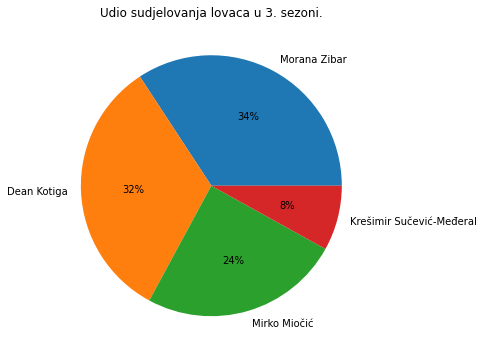

In [167]:
udio_igre_lovaca_po_sezoni(3)

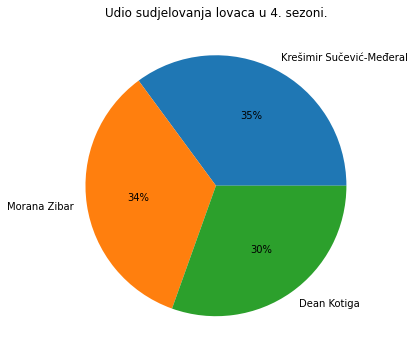

In [168]:
udio_igre_lovaca_po_sezoni(4)

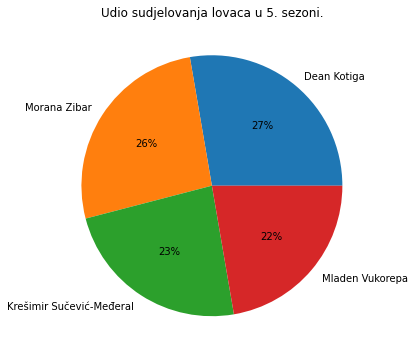

In [169]:
udio_igre_lovaca_po_sezoni(5)

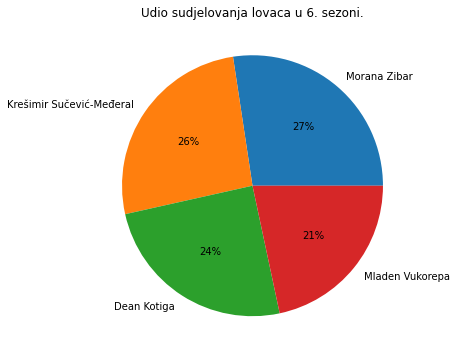

In [170]:
udio_igre_lovaca_po_sezoni(6)

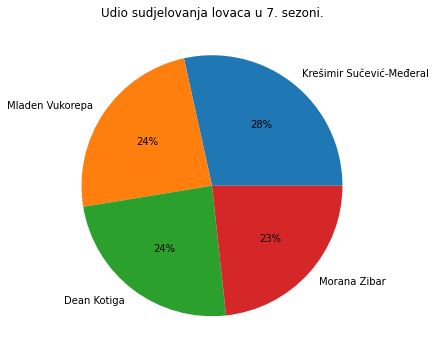

In [171]:
udio_igre_lovaca_po_sezoni(7)

Stupci **PLOCA1**, **PLOCA2**, **PLOCA3** i **PLOCA4** predstavljaju rezultate natjecatelja u pojedinačnoj igri protiv lovca.
U slučaju da je natjecatelj izgubio zapis u tablici glasi "Izgubio". Tu vrijednost ne možemo prepraviti na 0 ili na
neku negativnu vrijednost unaprijed definiranu jer lovac može ponuditi 0 kuna ili čak negativan iznos kuna ako
natjecatelj loše prođe u prvoj fazi natjecanja. Također pri daljnjoj analizi treba uzeti u obzir vrijednosti kao što su "(35 ili 25) 000 kn" gdje nije siguran podatak koliko je novaca natjecatelj osvojio.

In [172]:
data['PLOCA1'].head(30)

0                Izgubio
1                    NaN
2                    NaN
3                    NaN
4                    NaN
5                Izgubio
6                   5000
7                    NaN
8                    NaN
9                    NaN
10                   NaN
11                   NaN
12                   NaN
13                   NaN
14                   NaN
15                   NaN
16                   NaN
17                 50000
18                   NaN
19                   NaN
20                   NaN
21    (35 ili 25) 000 kn
22                   NaN
23                   NaN
24                   NaN
25                   NaN
26                 30000
27                   NaN
28                 35000
29                   NaN
Name: PLOCA1, dtype: object

Stupci sadrže i veliki broj NaN vrijednosti.

In [173]:
data['PLOCA1'].isnull().sum()

170

In [174]:
data['PLOCA2'].isnull().sum()

190

In [175]:
data['PLOCA3'].isnull().sum()

189

In [176]:
data['PLOCA4'].isnull().sum()

191

Iako stupci koji sadrže informacije koliko natjecatelj osvoji novaca ispred koje ploče sadrži veliki broj NaN vrijednosti
ili podataka u kojima nije točno poznato koliko je natjecatelj osvojio, može se izračunati koliko se prosječno
osvoji novaca ispred svake ploče bez tih vrijednosti. Iz tabličnog prikaza vidljivo je da treći natjecatelj po redu
osvoji prosječno najveći iznos novaca otprilike 32 895 kuna, a četvrti s prosječno 28 718 kuna najmanje.

In [177]:
ploca1_notnull=data[data['PLOCA1'].notnull()]
ploca1_s_novcima=ploca1_notnull[ploca1_notnull['PLOCA1'].str.isnumeric()!=False]
prosjek_ploca1=ploca1_s_novcima['PLOCA1'].sum()/ploca1_s_novcima['PLOCA1'].count()
mladen=ploca1_s_novcima[ploca1_s_novcima['LOVAC']=="Mladen Vukorepa"]

In [178]:
ploca2_notnull=data[data['PLOCA2'].notnull()]
ploca2_s_novcima=ploca2_notnull[ploca2_notnull['PLOCA2'].str.isnumeric()!=False]
prosjek_ploca2=ploca2_s_novcima['PLOCA2'].sum()/ploca2_s_novcima['PLOCA2'].count()

In [179]:
ploca3_notnull=data[data['PLOCA3'].notnull()]
ploca3_s_novcima=ploca3_notnull[ploca3_notnull['PLOCA3'].str.isnumeric()!=False]
prosjek_ploca3=ploca3_s_novcima['PLOCA3'].sum()/ploca3_s_novcima['PLOCA3'].count()

In [180]:
ploca4_notnull=data[data['PLOCA4'].notnull()]
ploca4_s_novcima=ploca4_notnull[ploca4_notnull['PLOCA4'].str.isnumeric()!=False]
prosjek_ploca4=ploca4_s_novcima['PLOCA4'].sum()/ploca4_s_novcima['PLOCA4'].count()

In [181]:
list1=[1,2,3,4]
list2=[prosjek_ploca1,prosjek_ploca2,prosjek_ploca3,prosjek_ploca4]
prosjek_novca_na_ploci=pd.DataFrame(list(zip(list1, list2)),columns =['BROJ_PLOCE', 'PROSJEK_NOVACA'])

prosjek_novca_na_ploci

,BROJ_PLOCE,PROSJEK_NOVACA
0,1,31340.359244
1,2,29926.257848
2,3,32895.883295
3,4,28718.833718


Grafički se može prikazati ovisnost prosječno osvojenog novca o ploči odnosno redoslijedu natjecatelja. Nakon što prvi natjecatelj
uspije pobijediti lovca i ostane u igri, drugom natjecatelju je cilj ostati u završnici
pa je prosječni iznos novaca nešto niži. Za trećeg natjecatelja raste prosječno osvojen novac da bi za četvrtog natjecatelja
iznos naglo pao. Može se pretpostaviti da je četvrtom natjecatelju kao zadnjem cilj samo proći dalje u natjecanju
bez težnje da pri tome puno doprinese ekipi jer i njima je u interesu da ih u završnoj potjeri bude više da im
šansa pobjede bude veća pa je time i njegov prosjek najniži.


Text(0.5, 1.0, 'Prosjek novca koje igrači prosječno osvoje za određenom pločom')

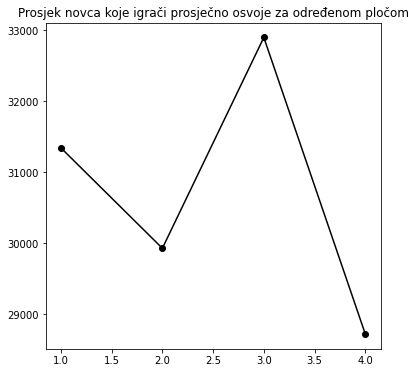

In [182]:
plt.plot(prosjek_novca_na_ploci.BROJ_PLOCE, prosjek_novca_na_ploci.PROSJEK_NOVACA,'-ok')
plt.title('Prosjek novca koje igrači prosječno osvoje za određenom pločom')

Može se razmotriti i koliko koji lovac nudi novaca ovisno o ploči odnosno rednom broju natjecatelja.


Za prvog natjecatelja prosječno Mladen nudi najviše novaca i to 33 663 kune. Iza njega slijedi Krešimir s prosječno 33 234 kune

In [183]:
prosjek_po_lovcu_ploca1=pd.DataFrame(ploca1_s_novcima.groupby(['LOVAC']).apply(lambda x: x['PLOCA1'].sum()/len(x)).reset_index(name='PROSJEK'))
prosjek_po_lovcu_ploca1

,LOVAC,PROSJEK
0,Dean Kotiga,31089.041096
1,Krešimir Sučević-Međeral,33234.567901
2,Mirko Miočić,31271.062500
3,Mladen Vukorepa,33663.636364
4,Morana Zibar,29688.356164


Za drugog natjecatelja Krešimir prosječno nudi 33 668 kuna što je najviše novaca za **PLOČA2** stupac. Mirko
nudi 20 201 kunu što je najmanji prosječni iznos kojeg lovac općenito ponudi natjecateljima pred pločom.

In [184]:
prosjek_po_lovcu_ploca2=pd.DataFrame(ploca2_s_novcima.groupby(['LOVAC']).apply(lambda x: x['PLOCA2'].sum()/len(x)).reset_index(name='PROSJEK'))
prosjek_po_lovcu_ploca2

,LOVAC,PROSJEK
0,Dean Kotiga,31449.345588
1,Krešimir Sučević-Međeral,33668.686747
2,Mirko Miočić,20201.903846
3,Mladen Vukorepa,31347.826087
4,Morana Zibar,29325.581395


Za trećeg natjecatelja Mladen ponudi najveću prosječnu ponudu od svih iznosa pred pločom te ona iznosi 43 136 kune. Mirko opet nudi
najmanji prosječni iznos koji je ovaj puta 22 400 kuna.

In [185]:
prosjek_po_lovcu_ploc3=pd.DataFrame(ploca3_s_novcima.groupby(['LOVAC']).apply(lambda x: x['PLOCA3'].sum()/len(x)).reset_index(name='PROSJEK'))
prosjek_po_lovcu_ploc3

,LOVAC,PROSJEK
0,Dean Kotiga,35720.480315
1,Krešimir Sučević-Međeral,33041.666667
2,Mirko Miočić,22400.000000
3,Mladen Vukorepa,43136.363636
4,Morana Zibar,29230.158730


Mladen i za četvrtog natjecatelja prosječno nudi najviše novaca, 31 949 kuna. Ovoga puta Morana nudi najnižih 26 381 kune.

In [186]:
prosjek_po_lovcu_ploca4=pd.DataFrame(ploca4_s_novcima.groupby(['LOVAC']).apply(lambda x: x['PLOCA4'].sum()/len(x)).reset_index(name='PROSJEK'))
prosjek_po_lovcu_ploca4

,LOVAC,PROSJEK
0,Dean Kotiga,29981.859504
1,Krešimir Sučević-Međeral,29278.571429
2,Mirko Miočić,27136.363636
3,Mladen Vukorepa,31949.152542
4,Morana Zibar,26318.181818


Od četiri ploče na tri Mladen prosječno nudi najviše novaca od svih drugih lovaca. Ovu činjenicu treba uzeti u obzir
pri daljnjem razmatranju uspješnosti lovaca.

Stupac **NOVAC** sadrži podatke koliko su ukupno novaca skupili natjecatelji koji su pobijedili lovca u pojedinačnoj igri protiv lovca.
Iz grafičkog prikaza osvojenog novca po epizodi može se primijetiti da je najviše iznosa u rasponu od 50 000 do 100 000 kuna uz neke stršeće vrijednosti.

Text(0.5, 1.0, 'Osvojeni novac po pojedinoj epizodi')

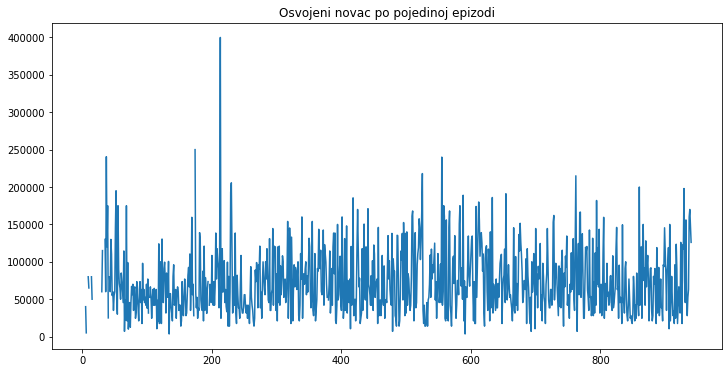

In [187]:
plt.subplots(figsize=(12,6))
plt.plot(data.index,data['NOVAC'])
plt.title("Osvojeni novac po pojedinoj epizodi")

Iz detaljnog opisa novca uočava se da je srednja vrijednost (*_engl._* mean) iznosa 72 994.68 veća od vrijednosti medijana koji poprima vrijednost 63 000 kuna. Iz tih podataka naslućuje se zakrivljenost distribucije u desno.
Najmanja osvojena vrijednost ekipe u pojedinačnoj igri s lovcem iznosi 3 500 kuna, a najveća 400 000 kuna. Sakupljena vrijednost
novca od strane natjecatelja poznata je za 916 epizoda.

In [188]:
data['NOVAC'].describe()

count       916.000000
mean      72994.681223
std       44181.643164
min        3500.000000
25%       42000.000000
50%       63000.000000
75%      100000.000000
max      400000.000000
Name: NOVAC, dtype: float64

Ukupan broj novaca koji je "prošao" kroz emisiju u 916 epizoda za koje postoji taj zapis iznosi 66 863 128 kuna.


In [189]:
uk_novac=data['NOVAC'].sum()
uk_novac

66863128.0

U skupljenom najvećem iznosu na potjeri sudjelovalo je 4 natjecatelja i u završnom krugu su odgovorili točno na 6 pitanja uz koja su dobili još 4 po svakom igraču. Nažalost u posljednjem krugu ih je lovac Morana Zibar sustigla s 20 sekundi do kraja.

In [190]:
data[data['NOVAC']==400000]

,SEZONA,EPIZODA,LOVAC,PLOCA1,PLOCA2,PLOCA3,PLOCA4,NOVAC,EKIPA_BR,EKIPA_REZ,LOVAC_REZ,VRIJEME,POBJEDNIK,LOVAC_POBJEDA
213,2,214,Morana Zibar,88000,99000,114000,99000,400000.0,4.0,10.0,10.0,20.0,LOVAC,1


Ni najmanji iznos od 3 500 kuna nije završio u rukama natjecatelja.

In [191]:
data[data['NOVAC']==3500]

,SEZONA,EPIZODA,LOVAC,PLOCA1,PLOCA2,PLOCA3,PLOCA4,NOVAC,EKIPA_BR,EKIPA_REZ,LOVAC_REZ,VRIJEME,POBJEDNIK,LOVAC_POBJEDA
2,1,3,Dean Kotiga,NaN,NaN,Izgubio,Izgubio,3500.0,2.0,9.0,9.0,1.0,LOVAC,1
134,2,135,Mirko Miočić,3500,Izgubio,Izgubio,Izgubio,3500.0,1.0,9.0,9.0,33.0,LOVAC,1
591,5,592,Krešimir Sučević-Međeral,Izgubio,Izgubio,Izgubio,3500,3500.0,1.0,5.0,5.0,65.0,LOVAC,1


Iz prikaza histograma novca uočava se oblik normalne distribucije koja je pozitivno zakrivljena.


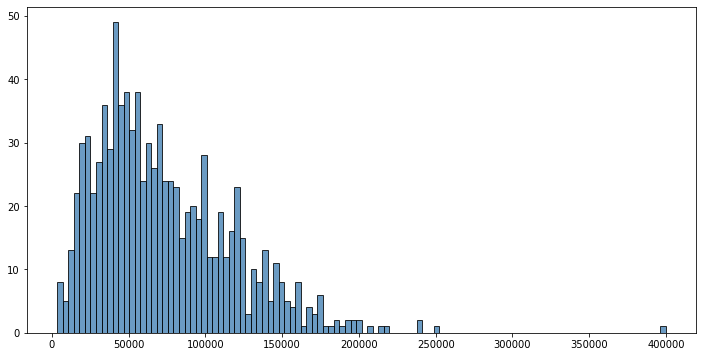

In [192]:
plt.subplots(figsize=(12,6))

plt.hist(data['NOVAC'],bins=110,alpha=0.8,
         histtype='bar',color='steelblue',
         edgecolor='black')

plt.show()

Činjenicu da pozitivno zakrivljena distribucija novca ima veću vrijednost srednje vrijednosti (crvena linija) od medijana (zelena linija) prikazuje slika ispod.
Mode (plava linija) je vrijednost koja se najčešće pojavljuje i prati "trbuh" distribucije.

[(-10000.0, 200000.0)]

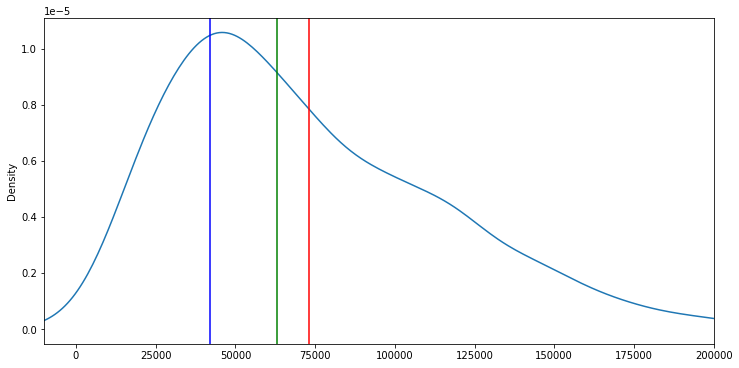

In [193]:
plt.subplots(figsize=(12,6))
ax=data['NOVAC'].plot(kind="density")
ax.axvline(data['NOVAC'].mean(),color='red')
ax.axvline(data['NOVAC'].median(),color='green')
ax.axvline(float(data['NOVAC'].mode()),color='blue')
ax.set(xlim=(-10000, 200000), )

Pravokutni dijagram (*_engl._* boxplot) također prikazuje pozitivnu zakrivljenost prema pomaknutom položaju medijana
u lijevo unutar pravokutnika. Također su prikazane crnim rombovima stršeće vrijednosti novca.

<AxesSubplot:xlabel='NOVAC'>

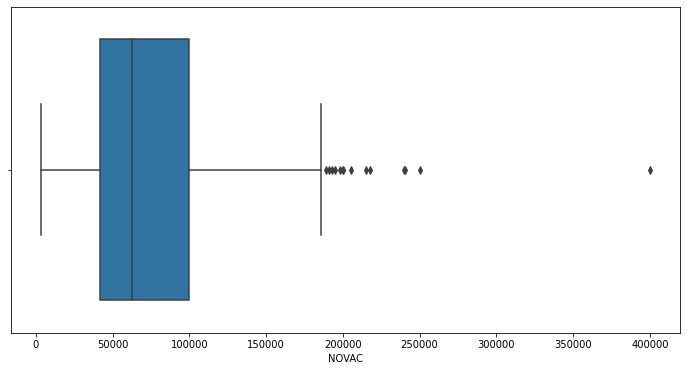

In [194]:
plt.subplots(figsize=(12,6))
sns.boxplot(x=data['NOVAC'])

Stupac **EKIPA_BR** označava broj natjecatelja koji su sudjelovali u zajedničkoj igri natjecatelja i završnoj potjeri lovca. Minimalan broj igrača je 1, a maksimalan 4 što je u skladu s pravilima igre.

In [195]:
data['EKIPA_BR'].describe()

count    776.000000
mean       2.396907
std        0.921256
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: EKIPA_BR, dtype: float64

165 redka ne sadrži podatke o broju natjecatelja.

In [196]:
data['EKIPA_BR'].isnull().sum()

165

Od svih epizoda koje sadrže broj natjecatelja najviše je ekipa bilo s dvoje natjecatelja.

2.0    296
3.0    244
1.0    136
4.0    100
Name: EKIPA_BR, dtype: int64

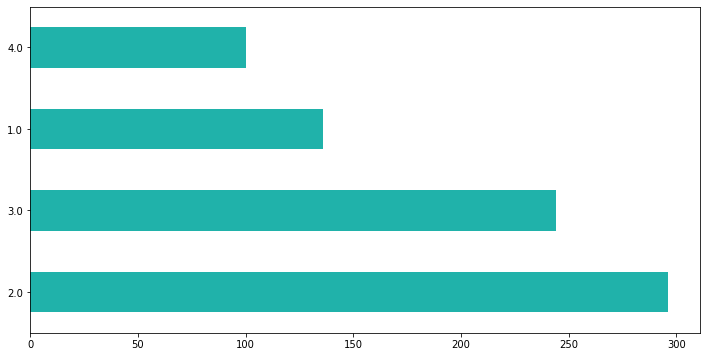

In [197]:

plt.subplots(figsize=(12,6))
data['EKIPA_BR'].value_counts().plot(kind='barh',color='lightseagreen', label='sezone')
data['EKIPA_BR'].value_counts()

Izračunajući ovisnost postotka pobjede ekipe o broju igrača u ekipi dobiju se podatci vidljivi u tablici.

In [198]:
prosjek_pobjede_po_broju_igraca=pd.DataFrame(data.groupby(['EKIPA_BR']).apply(lambda x:  (x['POBJEDNIK']=='EKIPA').sum()/len(x)).reset_index(name='POSTOTAK_POBJEDE_IGRCA'))
prosjek_pobjede_po_broju_igraca

,EKIPA_BR,POSTOTAK_POBJEDE_IGRCA
0,1.0,0.117647
1,2.0,0.199324
2,3.0,0.401639
3,4.0,0.520000


Grafički se može prikazati ta ovisnost gdje točke predstavljaju prosjek ovisan o broju igrača. Ako jedan igrač sudjeluje u
završnoj potjeri šansa da pobijedi mu je prosječno 11.76 %. Dvojica igrača u ekipi imaju nešto veći postotak od 19.93%.
Postotak uspješnosti za tri igrača naglo raste u odnosu na dva igrača i iznosi 40.16%. Četri igrača u završnoj potjeri
imaju 52% šansu da pobjede lovca. Iz grafičkog prikaza vidljiv je nagli skok od 20% s dva na tri igrača, dok s tri na četiri
igrača se uspješnost poveća za 12%. Ovisnost poprima rastući oblik koji blago opada na prijelazu s tri na četiri igrača.

Text(0.5, 1.0, 'Ovisnost postotka pobjede igrača o broju igrača')

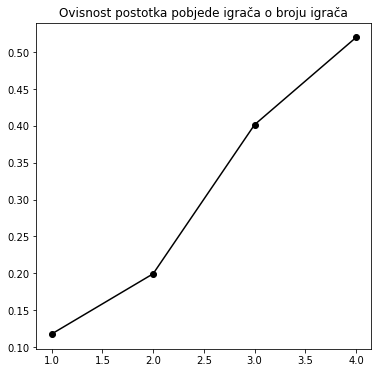

In [199]:
plt.plot(prosjek_pobjede_po_broju_igraca.EKIPA_BR, prosjek_pobjede_po_broju_igraca.POSTOTAK_POBJEDE_IGRCA,'-ok')
plt.title('Ovisnost postotka pobjede igrača o broju igrača')


Ovisno o broju članova u ekipi može se i izračunati koliko se puta prosječno točno odgovori na pitanje u završnoj potjeri protiv lovca.
Kada se ekipa sastoji od samo jednog igrača on prosječno točno odgovori na 9 pitanja u 120 sekundi. Dodatni član ekipe
doprinosi s prosječno još 2 točna pitanja. Tri igrača u ekipi odgovore na 13 pitanja što je još dva pitanja više u odnosu
na ekipu od dva igrača. Četiri igrača odgovore prosječno točno na 14 pitanja što je samo jedno pitanje više za dodatnog
člana u odnosu na ekipu od tri igrača.

In [200]:
broj_tocnih_po_broju_igraca=pd.DataFrame(data.groupby(['EKIPA_BR']).apply(lambda x:  x['EKIPA_REZ'].sum()/len(x)).reset_index(name='PROSJ_BROJ_ODG'))
broj_tocnih_po_broju_igraca

,EKIPA_BR,PROSJ_BROJ_ODG
0,1.0,9.220588
1,2.0,11.016892
2,3.0,13.147541
3,4.0,14.300000


Grafički je vidljiva ovisnost broja točnih odgovora o broju igrača. Blagi pad u rastućem obliku za četiri igrača
možemo objasniti time da je igračima teže postići dogovor i da si upadaju u riječ.

Text(0.5, 1.0, 'Ovisnost broja točnih odgovora igrača ekipe o broju igrača')

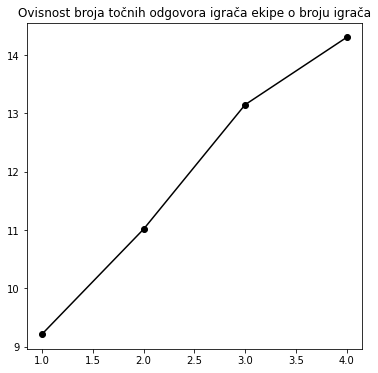

In [201]:
plt.plot(broj_tocnih_po_broju_igraca.EKIPA_BR, broj_tocnih_po_broju_igraca.PROSJ_BROJ_ODG,'-ok')
plt.title('Ovisnost broja točnih odgovora igrača ekipe o broju igrača')

Ovisnost novaca koji se skupi do završne potjere o broju natjecatelja u ekipi vidljiva je u tablici. Dodatni igrač u ekipi
od dvoje donosi prosječno još 30 000 kuna u odnosu na ekipu od jednog igrača. U ekipi od troje dodatni igrač donosi
još 22 000 kuna, a dodatni igrač u ekipi od četvero 20 000 kuna.

In [202]:
ekipa_prosjek_novac=pd.DataFrame(data.groupby(['EKIPA_BR']).apply(lambda x:  x['NOVAC'].sum()/len(x)).reset_index(name='NOVAC'))
ekipa_prosjek_novac

,EKIPA_BR,NOVAC
0,1.0,36291.544118
1,2.0,66182.432432
2,3.0,88945.586066
3,4.0,108927.550000


Tvrdnja da zadnji igrač ne doprinosi puno novčano u završnoj potjeri može se iščitati iz grafa gdje nagib pravca opada
u odnosu na ostale pravce koji spajaju točke ovisnosti. Iz toga se može naslutiti tvrdnja da je četvrtom igraču, a i ekipi
u interesu da uđe u  zadnju potjeru bez obzira na iznos novaca pa se često igrači znaju odlučiti za niže ponude.

Text(0.5, 1.0, 'Prosjek novca kojeg ekipa donese u završnu potjeru s obzirom na broj igrača')

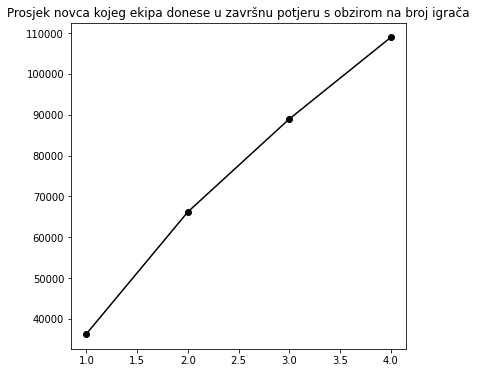

In [203]:
plt.plot(ekipa_prosjek_novac.EKIPA_BR, ekipa_prosjek_novac.NOVAC,'-ok')
plt.title('Prosjek novca kojeg ekipa donese u završnu potjeru s obzirom na broj igrača')

Stupac **EKIPA_REZ** označava broj točnih odgovora kojih su igrači uspjeli skupiti u 120 sekundi u zajedničkoj igri
natjecatelja plus ukupan broj natjecatelja što na kraju predstavlja broj koraka koliko su natjecatelji udaljeni od
 lovca u završnoj potjeri. **BR_EKIPA** predstavlja broj koliko je ekipa uspjelo skupiti određen broj koraka koliko su udaljeni
od lovca. Maksimalna postignuta vrijednost iznosi 20, a najmanja 3. Najčešći broj pitanja iznosi 12 kojih
 je čak 134 ekipa osvojilo.

In [204]:
data['EKIPA_REZ'].describe()

count    914.000000
mean      11.676149
std        3.127474
min        3.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       20.000000
Name: EKIPA_REZ, dtype: float64

In [205]:
ekipa_rez =pd.DataFrame( data.groupby(['EKIPA_REZ']).apply(lambda x: x['EKIPA_REZ'].count()).reset_index(name='BR_EKIPA'))
ekipa_rez=ekipa_rez.sort_values(by=['EKIPA_REZ'])
ekipa_rez

,EKIPA_REZ,BR_EKIPA
0,3.0,3
1,4.0,5
2,5.0,17
3,6.0,28
4,7.0,29
5,8.0,59
6,9.0,85
7,10.0,97
8,11.0,99
9,12.0,134


Iz histograma se uočava da je medijan malo pomaknut u desno, ali da distrbucija poprima oblik normalne distribucije.

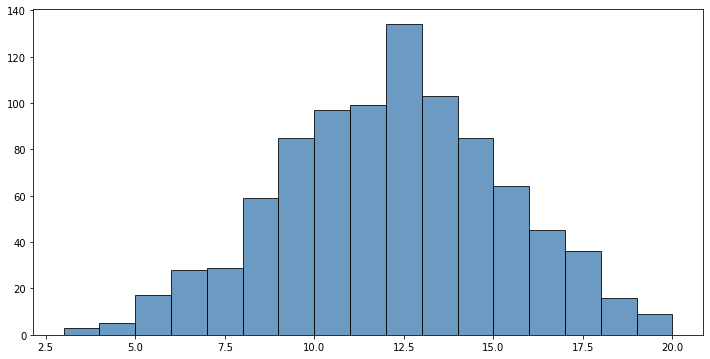

In [206]:
plt.subplots(figsize=(12,6))

plt.hist(data['EKIPA_REZ'],bins=17,alpha=0.8,
         histtype='bar',color='steelblue',
         edgecolor='black')

plt.show()

Srednja vrijednost(crvena linija) iznosi 11.67, a medijan (zelena linija) 12 pa zaključujemo da je distribucija malo zakrivljena u negativnu stranu.

[(0.0, 25.0)]

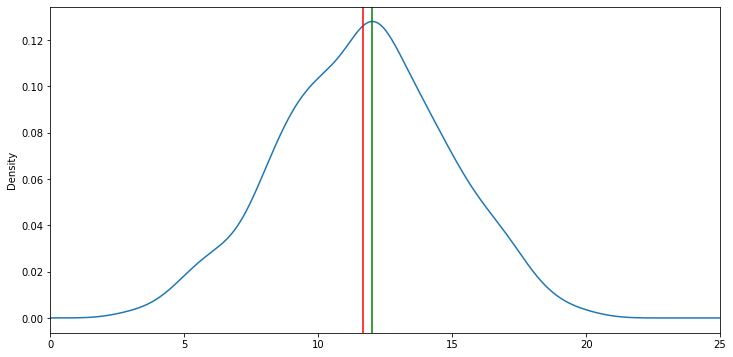

In [207]:
plt.subplots(figsize=(12,6))
ax=data['EKIPA_REZ'].plot(kind="density")
ax.axvline(data['EKIPA_REZ'].mean(),color='red')
ax.axvline(data['EKIPA_REZ'].median(),color='green')
ax.set(xlim=(0, 25), )

Pravokutni dijagram ukazuje na stršeću vrijednost rezultata ekipe u iznosu 3. Medijan se nalazi na sredini pravokutnika
pa se time ne može naslutiti blaga nepravilnost odnosno zakrivljenost u negativnu stranu distribucije.

<AxesSubplot:xlabel='EKIPA_REZ'>

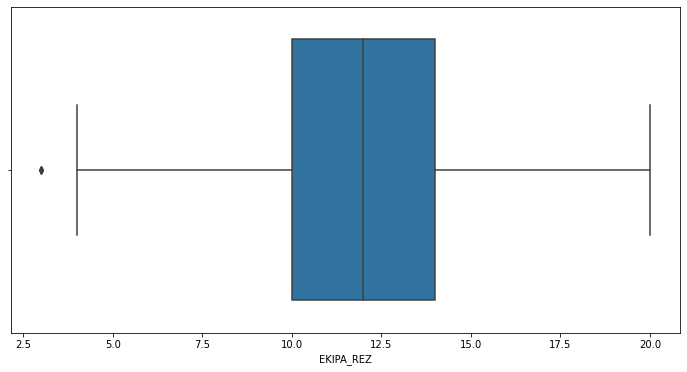

In [208]:
plt.subplots(figsize=(12,6))
sns.boxplot(x=data['EKIPA_REZ'])

Analizirajući podatke u kojima je postigut najveći broj koraka u emisiji koji je iznosio 20 vidimo da lovci nikada nisu uspjeli dostignuti
te ekipe.

In [209]:
data[data['EKIPA_REZ']==20]

,SEZONA,EPIZODA,LOVAC,PLOCA1,PLOCA2,PLOCA3,PLOCA4,NOVAC,EKIPA_BR,EKIPA_REZ,LOVAC_REZ,VRIJEME,POBJEDNIK,LOVAC_POBJEDA
37,1,38,Dean Kotiga,45000,10000,30000,155555,240555.0,4.0,20.0,18.0,NaN,EKIPA,0
76,2,77,Dean Kotiga,Izgubio,11111,35000,21000,67111.0,3.0,20.0,16.0,0.0,EKIPA,0
181,2,182,Morana Zibar,24500,14000,90000,10500,139000.0,4.0,20.0,4.0,0.0,EKIPA,0


S druge strane ekipe s najmanjim skupljenim brojem koraka u emisiji su izgubile od lovca. Vidimo također da su se te ekipe
sastojale od samo jednog igrača.

In [210]:
data[data['EKIPA_REZ']==3]


,SEZONA,EPIZODA,LOVAC,PLOCA1,PLOCA2,PLOCA3,PLOCA4,NOVAC,EKIPA_BR,EKIPA_REZ,LOVAC_REZ,VRIJEME,POBJEDNIK,LOVAC_POBJEDA
152,2,153,Mirko Miočić,Izgubio,Izgubio,Izgubio,14000,14000.0,1.0,3.0,3.0,102.0,LOVAC,1
225,3,226,Mirko Miočić,Izgubio,14000,Izgubio,Izgubio,14000.0,1.0,3.0,3.0,79.0,LOVAC,1
801,6,803,Morana Zibar,Izgubio,70000,Izgubio,Izgubio,70000.0,1.0,3.0,3.0,79.0,LOVAC,1


Može se pokušati objaniti ovisnost uspješnosti lovca o broju koraka koje ekipa postigne. Ovisnost uspješnosti vidljiva je u tablici. Vidimo da postoji
postotak uspješnosti od 0 % za 20 koraka ekipe što smo vidjeli i ranije. Druga najniža uspješnost postignuta je za 19 koraka
i iznosi samo 16.67% što predstavlja podatak da od 6 ekipa koje su skupile 19 bodova samo je jednu lovac uspio pobijediti.

In [211]:
def fun_pobjeda_o_ekipa_rez(x):
    d = {}
    d['BR_EKIPA'] = x["EKIPA_REZ"].count()
    d['POSTOTAK_POBJEDE_LOVCA']=((x['POBJEDNIK']=='LOVAC').sum()/len(x))

    return pd.Series(d, index=['BR_EKIPA', 'POSTOTAK_POBJEDE_LOVCA'])


In [212]:
postotak_pobjede_lovca_o_rez_ekipe=pd.DataFrame(data.groupby(['EKIPA_REZ']).apply(fun_pobjeda_o_ekipa_rez))
postotak_pobjede_lovca_o_rez_ekipe

,BR_EKIPA,POSTOTAK_POBJEDE_LOVCA
EKIPA_REZ,,
3.0,3.0,1.000000
4.0,5.0,1.000000
5.0,17.0,0.941176
6.0,28.0,0.928571
7.0,29.0,1.000000
8.0,59.0,0.949153
9.0,85.0,0.929412
10.0,97.0,0.876289
11.0,99.0,0.818182


Maksimalna uspješnost lovaca od 100% postignuta je za 3, 4 i 7 koraka skupljenih od strane ekipe. Lovci su uspjeli
pobjediti ukupno 37 ekipa s tim rezultatima.

In [213]:
postotak_pobjede_lovca_o_rez_ekipe[postotak_pobjede_lovca_o_rez_ekipe["POSTOTAK_POBJEDE_LOVCA"]==1]

,BR_EKIPA,POSTOTAK_POBJEDE_LOVCA
EKIPA_REZ,,
3.0,3.0,1.0
4.0,5.0,1.0
7.0,29.0,1.0


Grafički se ovinost uspješnosti lovaca o broju koraka ekipe može prikažati histogramom. Na njemu je vidljivo da uspješnost
lovca naglo opada od 10 skupljenih koraka ekipe prema 20 gdje iznosi nula.

Text(0.5, 1.0, 'Postotak uspješnosti lovaca ovisno o broju koraka ekipe.')

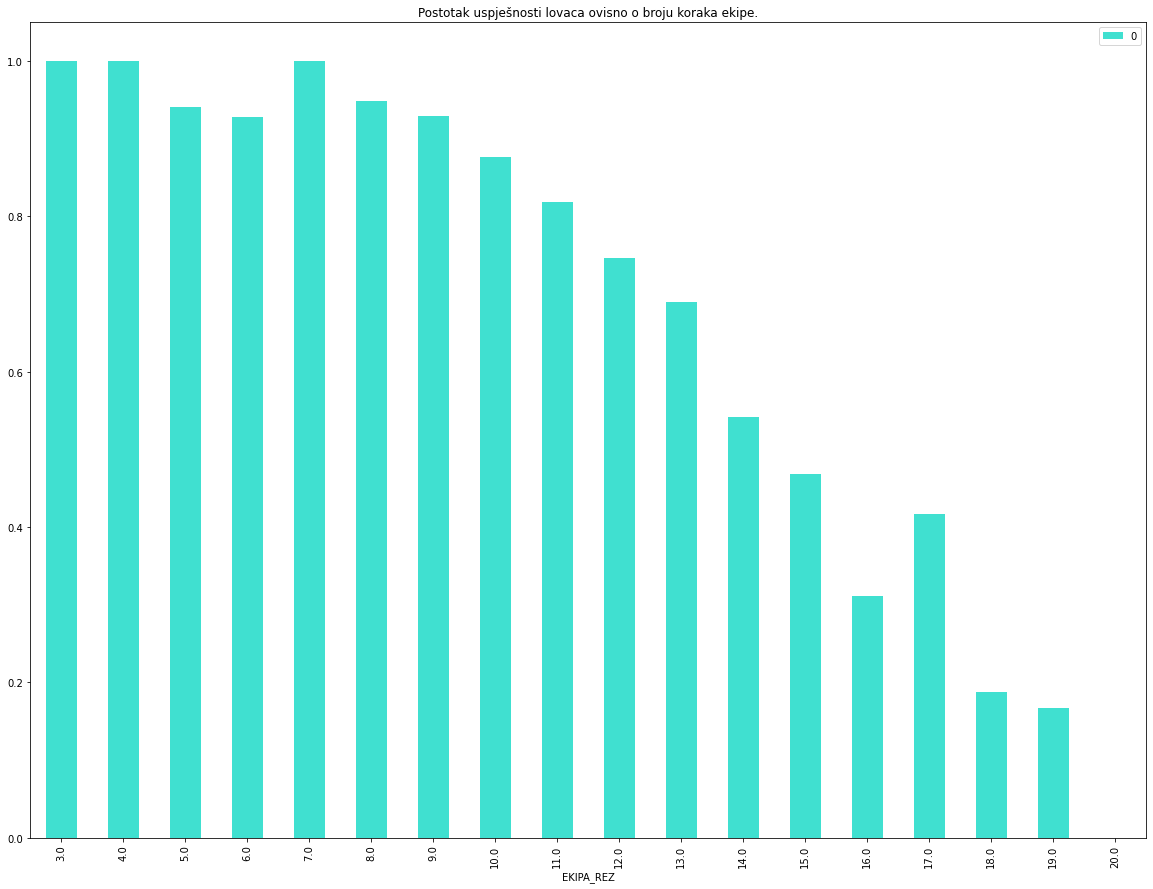

In [214]:
plt.rcParams["figure.figsize"] = (20,15)
pd.DataFrame(data.groupby(['EKIPA_REZ']).apply(lambda x: (x['POBJEDNIK']=='LOVAC').sum()/len(x))).plot(kind='bar',color="turquoise")
plt.rcParams["figure.figsize"] = (6,6)
plt.title('Postotak uspješnosti lovaca ovisno o broju koraka ekipe.')

Stupac **LOVAC_REZ** predstavlja broj točno odgovorenih pitanja od strane lovca u završnoj potjeri. Analizom podataka tog stupca uočava se da je od 941 epizode dostupno 913 podataka te vrijednosti. Maksimalna vrijednost iznosi 19 što ujedno znači da je ekipa s rezultatom 20 pobjedila lovca. Minimalna vrijednost iznosi 2.

In [215]:
data['LOVAC_REZ'].describe()

count    913.000000
mean      10.573932
std        2.946016
min        2.000000
25%        9.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: LOVAC_REZ, dtype: float64

Iz histograma se uočava bimodalni oblik distribucije.

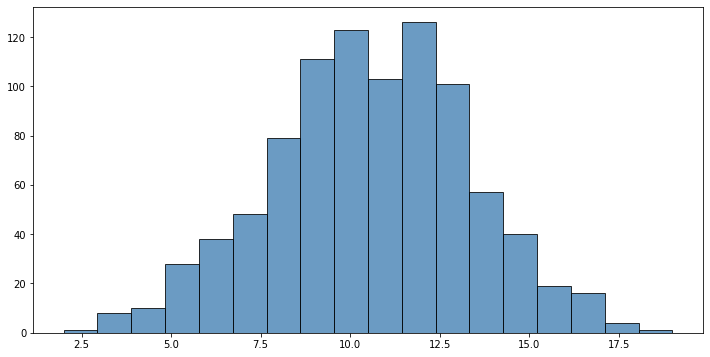

In [216]:
plt.subplots(figsize=(12,6))

plt.hist(data['LOVAC_REZ'],bins=18,alpha=0.8,
         histtype='bar',color='steelblue',
         edgecolor='black')

plt.show()

[(0.0, 25.0)]

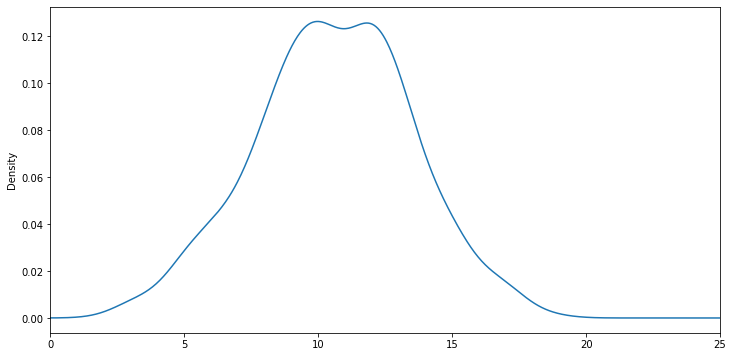

In [217]:
plt.subplots(figsize=(12,6))
ax=data['LOVAC_REZ'].plot(kind="density")
ax.set(xlim=(0, 25), )

Pravokutni dijagram prikazuje stršeću vrijednost rezultata lovaca u iznosu 2. Iz njega se ne može iščitati blaga nepravilnost distribucije.

<AxesSubplot:xlabel='LOVAC_REZ'>

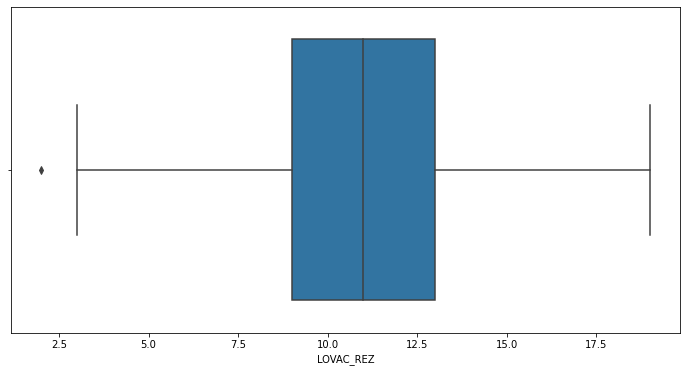

In [218]:
plt.subplots(figsize=(12,6))
sns.boxplot(x=data['LOVAC_REZ'])

Lovac uvijek pokušava sustići broj točnih odgovora ekipe i kada mu to uspije igra završava. Iz grafa ovisnosti vidimo da
rezultat lovca nikad ne prelazi rezultat ekipe odnosno nema podataka ispod pravca **y = x**. Znajući rezultat ekipe
može se pokušati predvidjeti rezultat lovca.

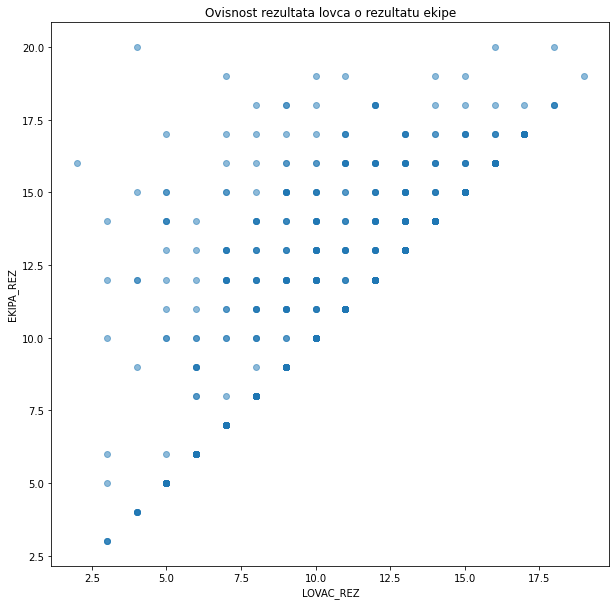

In [219]:
plt.subplots(figsize=(10,10))
plt.scatter(data['LOVAC_REZ'], data['EKIPA_REZ'], alpha=0.5)
plt.title('Ovisnost rezultata lovca o rezultatu ekipe')
plt.xlabel('LOVAC_REZ')
plt.ylabel('EKIPA_REZ')
plt.show()

Od svih lovaca Mladen Vukorepa je jedini lovac koji je uspio skupiti najveći broj točnih odgovora u epizodi, točnije njih 19.
Osim što je skupio najviši iznos točnih odgovora od svih lovaca treba istaknuti da je u toj igri i pobijedio.

In [220]:
print(data['LOVAC_REZ'].max())
data[data['LOVAC_REZ']==data['LOVAC_REZ'].max()]['LOVAC']

19.0


884    Mladen Vukorepa
Name: LOVAC, dtype: object

In [221]:
data[data['LOVAC_REZ']==data['LOVAC_REZ'].max()]

,SEZONA,EPIZODA,LOVAC,PLOCA1,PLOCA2,PLOCA3,PLOCA4,NOVAC,EKIPA_BR,EKIPA_REZ,LOVAC_REZ,VRIJEME,POBJEDNIK,LOVAC_POBJEDA
884,7,886,Mladen Vukorepa,Izgubio,49000,21000,21000,91000.0,3.0,19.0,19.0,5.0,LOVAC,1


Najviše točno odgovorenih pitanja je skupio Dean Kotiga i to 2877.

In [222]:
data.groupby(['LOVAC']).apply(lambda x:  x['LOVAC_REZ'].sum())

LOVAC
Dean Kotiga                 2877.0
Krešimir Sučević-Međeral    1977.0
Mirko Miočić                1065.0
Mladen Vukorepa             1019.0
Morana Zibar                2716.0
dtype: float64

Uzme li se u obzir činjenica da nisu svi lovci sudjelovali u svim sezonama odnosno u jednakom broju epizoda računanjem srednje
vrijednosti točnih odgovora na pitanje po epizodi dobiju se sljedeći rezultati:

In [223]:
data.groupby(['LOVAC']).apply(lambda x:  x['LOVAC_REZ'].sum()/len(x))

LOVAC
Dean Kotiga                 10.348921
Krešimir Sučević-Međeral    11.362069
Mirko Miočić                 9.424779
Mladen Vukorepa             10.726316
Morana Zibar                 9.665480
dtype: float64

Može se zaključiti da je u prosjeku Krešimir Sučević-Međeral lovac s najviše točnih odgovora po epizodi.



**VRIJEME** označava koliko je vremena u sekundama ostalo lovcu u trenutku kada je sustigao natjecatelje. Podatci o vremenu
dostupni su za 901 epizodu. Ukupno raspoloživo vrijeme lovca je 120 sekundi, a minimalna i maksimalna vrijednost su u tom rasponu.
Minimalna vrijednost nula označava da je vrijeme isteklo i da lovac nije uspio sustići ekipu.


In [224]:
data['VRIJEME'].describe()

count    901.000000
mean      21.631521
std       22.598861
min        0.000000
25%        0.000000
50%       15.000000
75%       37.000000
max      102.000000
Name: VRIJEME, dtype: float64

Distribucija vremena je pozitivno zakrivljena. Najviše podataka ima 0 sekundi vremena, a srednja vrijednost od 21.63 sekunde je veća
o vrijednosti medijana koji iznosi 15 sekundi.

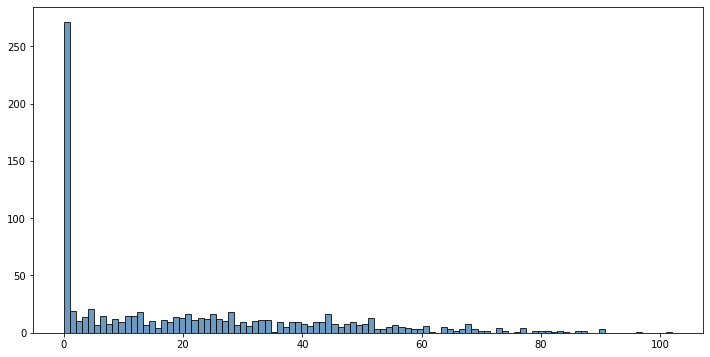

In [225]:
plt.subplots(figsize=(12,6))

plt.hist(data['VRIJEME'],bins=100,alpha=0.8,
         histtype='bar',color='steelblue',
         edgecolor='black')

plt.show()

Odnos moda (plava linija), medijana (zelena linija) i srednje vrijednosti (crvena linija) potvrđuju pozitivnu zakrivljenost distribucije

[(-15.0, 120.0)]

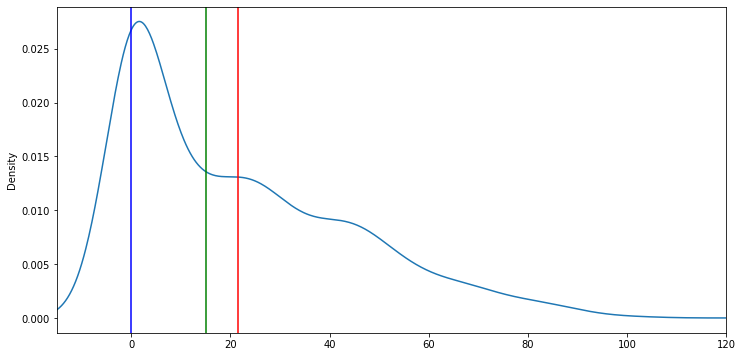

In [226]:
plt.subplots(figsize=(12,6))
ax=data['VRIJEME'].plot(kind="density")
ax.axvline(data['VRIJEME'].mean(),color='red')
ax.axvline(data['VRIJEME'].median(),color='green')
ax.axvline(float(data['VRIJEME'].mode()),color='blue')
ax.set(xlim=(-15, 120), )

Mirko Miočić je lovac s ukupno najmanje vremena kojeg mu je ostalo prije nego što je pobijedio ekipu, dok je Morani ukupno ostalo najviše vremena.

In [227]:
data.groupby(['LOVAC']).apply(lambda x:  x['VRIJEME'].sum())

LOVAC
Dean Kotiga                 4466.0
Krešimir Sučević-Međeral    4809.0
Mirko Miočić                2252.0
Mladen Vukorepa             2305.0
Morana Zibar                5658.0
dtype: float64

**POBJEDNIK** označava tko je u konačnici pobijedio lovac ili ekipa.

In [228]:
list(data['POBJEDNIK'].unique())

['LOVAC', 'EKIPA']

Podatci o pobjedi dostupni su za sve epizode odnosno 0 podataka ima nepoznatu vrijednost pobjednika.

In [229]:
data['POBJEDNIK'].isnull().sum()

0

Ukupno gledajući lovci su bili puno uspješniji od ekipa.

LOVAC    676
EKIPA    265
Name: POBJEDNIK, dtype: int64

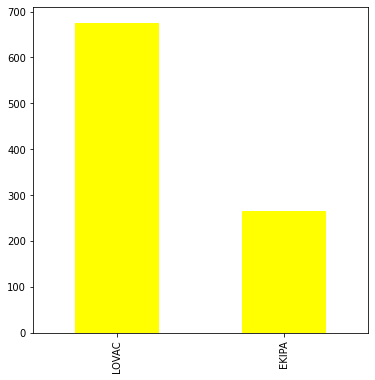

In [230]:
pobjednik_vrijednosti = data['POBJEDNIK'].value_counts()
pobjednik_vrijednosti.plot(kind='bar',color='yellow', label='pobjednik')
pobjednik_vrijednosti

Uspješnost lovaca je 71.84 %.

In [231]:
data[data['POBJEDNIK']=='LOVAC'].shape[0]/data.shape[0]

0.718384697130712

Da ekipa pobjedi mora ukupan broj koraka ekipe biti veći od koraka lovca što je slučaj za 254 podatka, a raniji rezultati pokazali su da su ekipe
pobjedile ukupno 265 puta.

In [232]:
(data['EKIPA_REZ'] > data['LOVAC_REZ']).sum()

254

Analizom null vrijednosti u slučaju kada je ekipa pobjedila vidimo da stupac **EKIPA_REZ** 11 puta nema zapisanu vrijednost
što u zbroju daje 265. Također se vidi da je vrijeme za 24 epizode označeno kao nepoznato. Budući da se radi o pobjedi ekipe
to jednoznačno označava da je lovcu vrijeme isteklo i da on nije sustigao ekipu u broju koraka.

In [233]:
(data[data['POBJEDNIK']== 'EKIPA']).isnull().sum()

SEZONA            0
EPIZODA           0
LOVAC             0
PLOCA1           41
PLOCA2           44
PLOCA3           42
PLOCA4           43
NOVAC            11
EKIPA_BR         40
EKIPA_REZ        11
LOVAC_REZ        12
VRIJEME          24
POBJEDNIK         0
LOVAC_POBJEDA     0
dtype: int64

Podatke o vremenu u tom slučaju možemo postaviti na 0 sekundi i time više nema nepoznatih vrijednosti vremena kada je ekipa pobjednik.

In [234]:
data.loc[data['POBJEDNIK']== 'EKIPA', 'VRIJEME'] = data.loc[data['POBJEDNIK']== 'EKIPA', 'VRIJEME'].fillna(0)
(data[data['POBJEDNIK']== 'EKIPA']).isna().sum()

SEZONA            0
EPIZODA           0
LOVAC             0
PLOCA1           41
PLOCA2           44
PLOCA3           42
PLOCA4           43
NOVAC            11
EKIPA_BR         40
EKIPA_REZ        11
LOVAC_REZ        12
VRIJEME           0
POBJEDNIK         0
LOVAC_POBJEDA     0
dtype: int64

Broj pobjeda i poraza pojedinog lovca vidljiv je u tablici.


In [235]:
lovci_pobjeda = pd.crosstab(data['LOVAC'], data['POBJEDNIK'])
lovci_pobjeda

POBJEDNIK,EKIPA,LOVAC
LOVAC,,
Dean Kotiga,92,186
Krešimir Sučević-Međeral,25,149
Mirko Miočić,37,76
Mladen Vukorepa,25,70
Morana Zibar,86,195


Strukturni krug vizualno daje bolju predodžbu o udjelu pobjede pojedinog lovca od ukupnog broja pobjeda. Morana i Dean s 28% i 27%
su vodeći lovci.

Text(0.5, 1.0, 'Udio pobjeda lovaca')

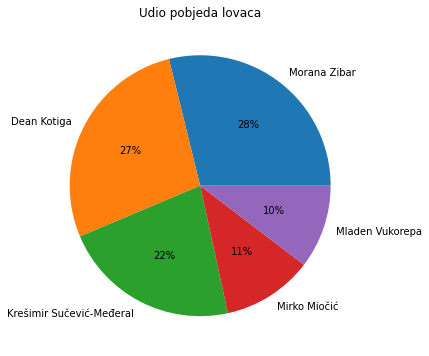

In [236]:
labels=data[data['POBJEDNIK']=='LOVAC']['LOVAC'].value_counts().index.tolist()
plt.pie(data[data['POBJEDNIK']=='LOVAC']['LOVAC'].value_counts(),labels=labels,autopct='%i%%')
plt.title('Udio pobjeda lovaca')

No uzmu li se u obzir svi porazi lovaca Morana i Dean s 34% i 32% su opet vodeći.


Text(0.5, 1.0, 'Udio poraza lovaca')

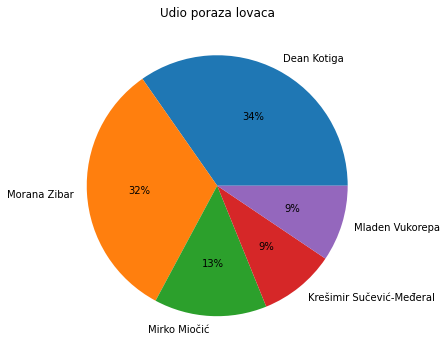

In [237]:
labels=data[data['POBJEDNIK']=='EKIPA']['LOVAC'].value_counts().index.tolist()
plt.pie(data[data['POBJEDNIK']=='EKIPA']['LOVAC'].value_counts(),labels=labels,autopct='%i%%')
plt.title('Udio poraza lovaca')

Uzme li se činjenica da lovci nisu sudjelovali u jednakom broj epizoda uspješnost lovca se računa prema broju pobjeda podijeljeno
s ukupnim brojem epizoda u kojim su sudjelovali. Rezultati pokazuju da je najuspješniji lovac Krešimir Sučević-Međeral s 85.63% pobjeda kroz epizode.

In [238]:
data.groupby(['LOVAC']).apply(lambda x: (x['POBJEDNIK']=='LOVAC').sum()/len(x))

LOVAC
Dean Kotiga                 0.669065
Krešimir Sučević-Međeral    0.856322
Mirko Miočić                0.672566
Mladen Vukorepa             0.736842
Morana Zibar                0.693950
dtype: float64

Uspješnost lovca može se prikazati i s obzirom na sezone. Mogući je scenarij da je neki lovac jako dobro odigrao neku sezonu, a
u nekoj je jako zakazao pa mu je ukupna uspješnost niža. Tablice prikazuju ovisnost pobjeda lovca ili ekipe po sezoni
za svekaog od lovaca. Prva tablica sadrži samo one lovce koji su sudjelovali u određenoj sezoni, dok druga sadrži sve lovce.
Vrijednost nula i za pobjedu ekipe i za pobjedu lovca označavaju da lovac nije sudjelovao u tim sezonama.

In [239]:
lovci_pobjeda_po_sezonama = pd.crosstab([data['SEZONA'],data['LOVAC']], data['POBJEDNIK'])
lovci_pobjeda_po_sezonama

POBJEDNIK                        EKIPA  LOVAC
SEZONA LOVAC                                 
1      Dean Kotiga                   7     14
       Mirko Miočić                 10     11
       Morana Zibar                  6     13
2      Dean Kotiga                  18     36
       Mirko Miočić                 16     39
       Morana Zibar                 13     37
3      Dean Kotiga                  18     31
       Krešimir Sučević-Međeral      1     11
       Mirko Miočić                 11     26
       Morana Zibar                 19     32
4      Dean Kotiga                  13     33
       Krešimir Sučević-Međeral      8     45
       Morana Zibar                 18     34
5      Dean Kotiga                  13     28
       Krešimir Sučević-Međeral      5     30
       Mladen Vukorepa              10     23
       Morana Zibar                 16     23
6      Dean Kotiga                  11     28
       Krešimir Sučević-Međeral      7     34
       Mladen Vukorepa              11     23
       Morana Zibar                  9     34
7      Dean Kotiga                  12     16
       Krešimir Sučević-Međeral      4     29
       Mladen Vukorepa               4     24
       Morana Zibar                  5     22

In [240]:
lovci_pobjeda_po_sezonama2 = pd.crosstab(data['SEZONA'],[data['LOVAC'], data['POBJEDNIK']])
lovci_pobjeda_po_sezonama2

LOVAC     Dean Kotiga       Krešimir Sučević-Međeral       Mirko Miočić        \
POBJEDNIK       EKIPA LOVAC                    EKIPA LOVAC        EKIPA LOVAC   
SEZONA                                                                          
1                   7    14                        0     0           10    11   
2                  18    36                        0     0           16    39   
3                  18    31                        1    11           11    26   
4                  13    33                        8    45            0     0   
5                  13    28                        5    30            0     0   
6                  11    28                        7    34            0     0   
7                  12    16                        4    29            0     0   

LOVAC     Mladen Vukorepa       Morana Zibar        
POBJEDNIK           EKIPA LOVAC        EKIPA LOVAC  
SEZONA                                              
1                       0     0            6    13  
2                       0     0           13    37  
3                       0     0           19    32  
4                       0     0           18    34  
5                      10    23           16    23  
6                      11    23            9    34  
7                       4    24            5    22

Ovinost pobjede lovca i ekipa po sezonama i po lovcima prikazana je u grafičkim prikazima. Prvi prikaz s dvije boje
prikazuje broj pobjeda lovca(narančasta) i broj pobjeda ekipa(plavo) za sve lovce koji su sudjelovali u svakoj sezoni.
Vidljivo je da je Krešimir pobijedio najveći broj puta u cijeloj emisiji u 4. sezoni s 45 pobjeda.

<AxesSubplot:ylabel='SEZONA,LOVAC'>

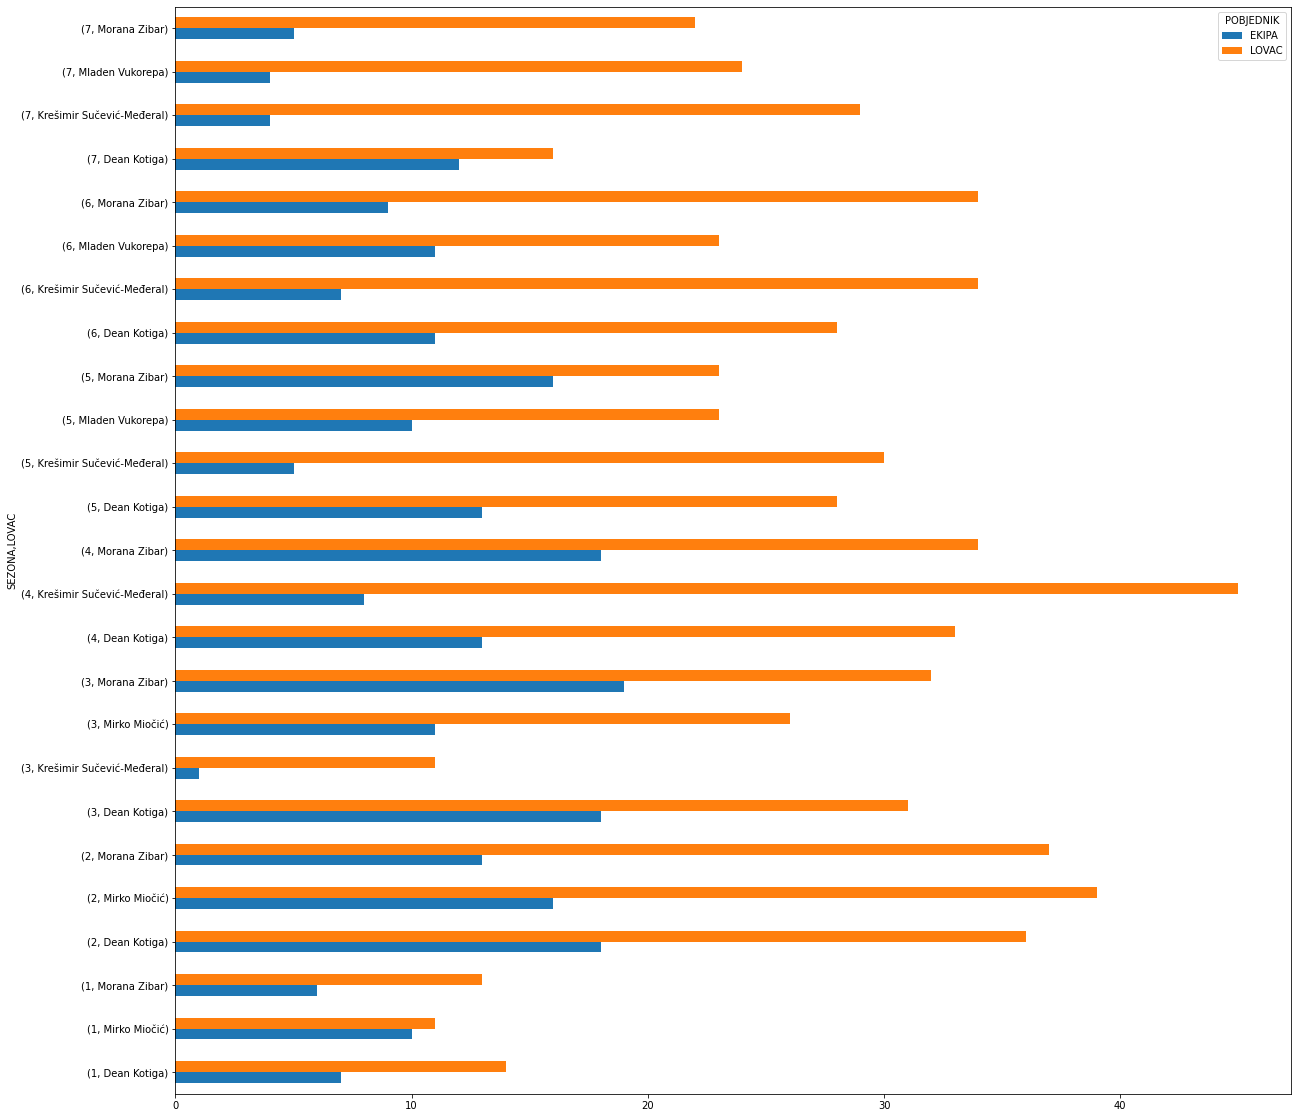

In [241]:
plt.rcParams["figure.figsize"] = (20,20)
lovci_pobjeda_po_sezonama.plot(kind='barh')

Drugi grafički prikaz grupira sezone i sve pobjede i poraze lovaca prikazuje različitom bojom.

<AxesSubplot:ylabel='SEZONA'>

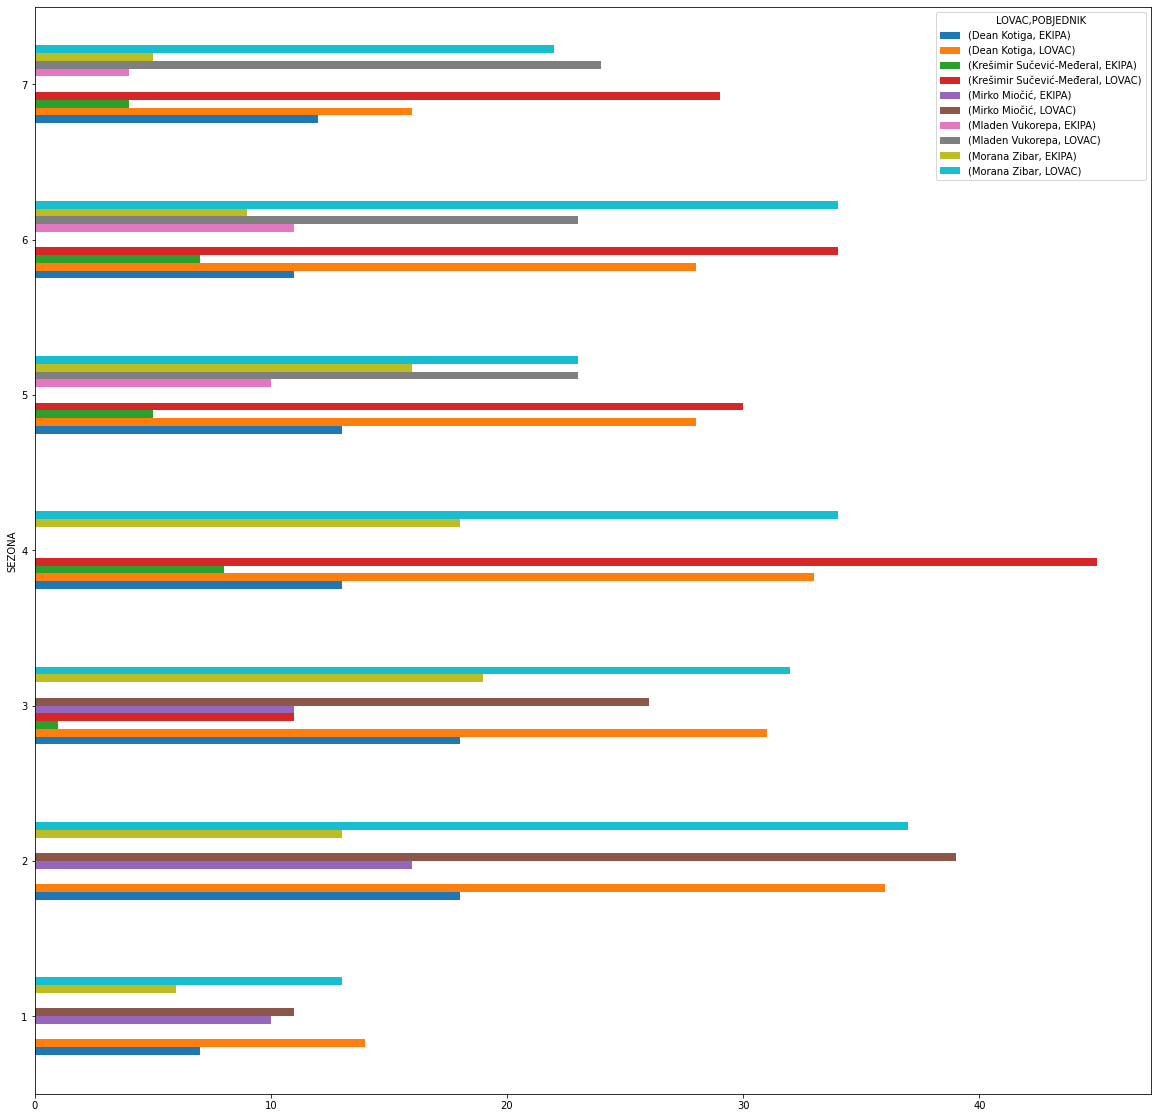

In [242]:
lovci_pobjeda_po_sezonama2.plot(kind='barh')

Uspješnog pojednig lovca po sezoni mogla bi se naslutiti iz grafičkih prikaza. Za točnu procjenu izračuna se prosjek
pobjeda lovca kroz sve epizode u sezoni.

In [243]:
postotak_pobjede_po_sezonama=pd.DataFrame(data.groupby(['SEZONA','LOVAC']).apply(lambda x: (x['POBJEDNIK']=='LOVAC').sum()/len(x)).reset_index(name='PROSJEK'))
postotak_pobjede_po_sezonama

,SEZONA,LOVAC,PROSJEK
0,1,Dean Kotiga,0.666667
1,1,Mirko Miočić,0.523810
2,1,Morana Zibar,0.684211
3,2,Dean Kotiga,0.666667
4,2,Mirko Miočić,0.709091
5,2,Morana Zibar,0.740000
6,3,Dean Kotiga,0.632653
7,3,Krešimir Sučević-Međeral,0.916667
8,3,Mirko Miočić,0.702703
9,3,Morana Zibar,0.627451


Radi bolje usporedbe uspješnosti lovaca po sezonama poslužio je grafički prikaz.
Iako je Krešimir postigao najveći broj pobjeda u 4. sezoni najuspješniji je bio u 3. sezoni. Također je vidljivo iz grafa
da je bio najuspješniji lovac u svim sezonama u kojima je sudjelovao. U sezonama u kojima nije sudjelovao najuspješnija je
bila Morana, ali treba uočiti da je njena uspješnost manja od najmanje Krešimirove uspješnosti iz 6. sezone.

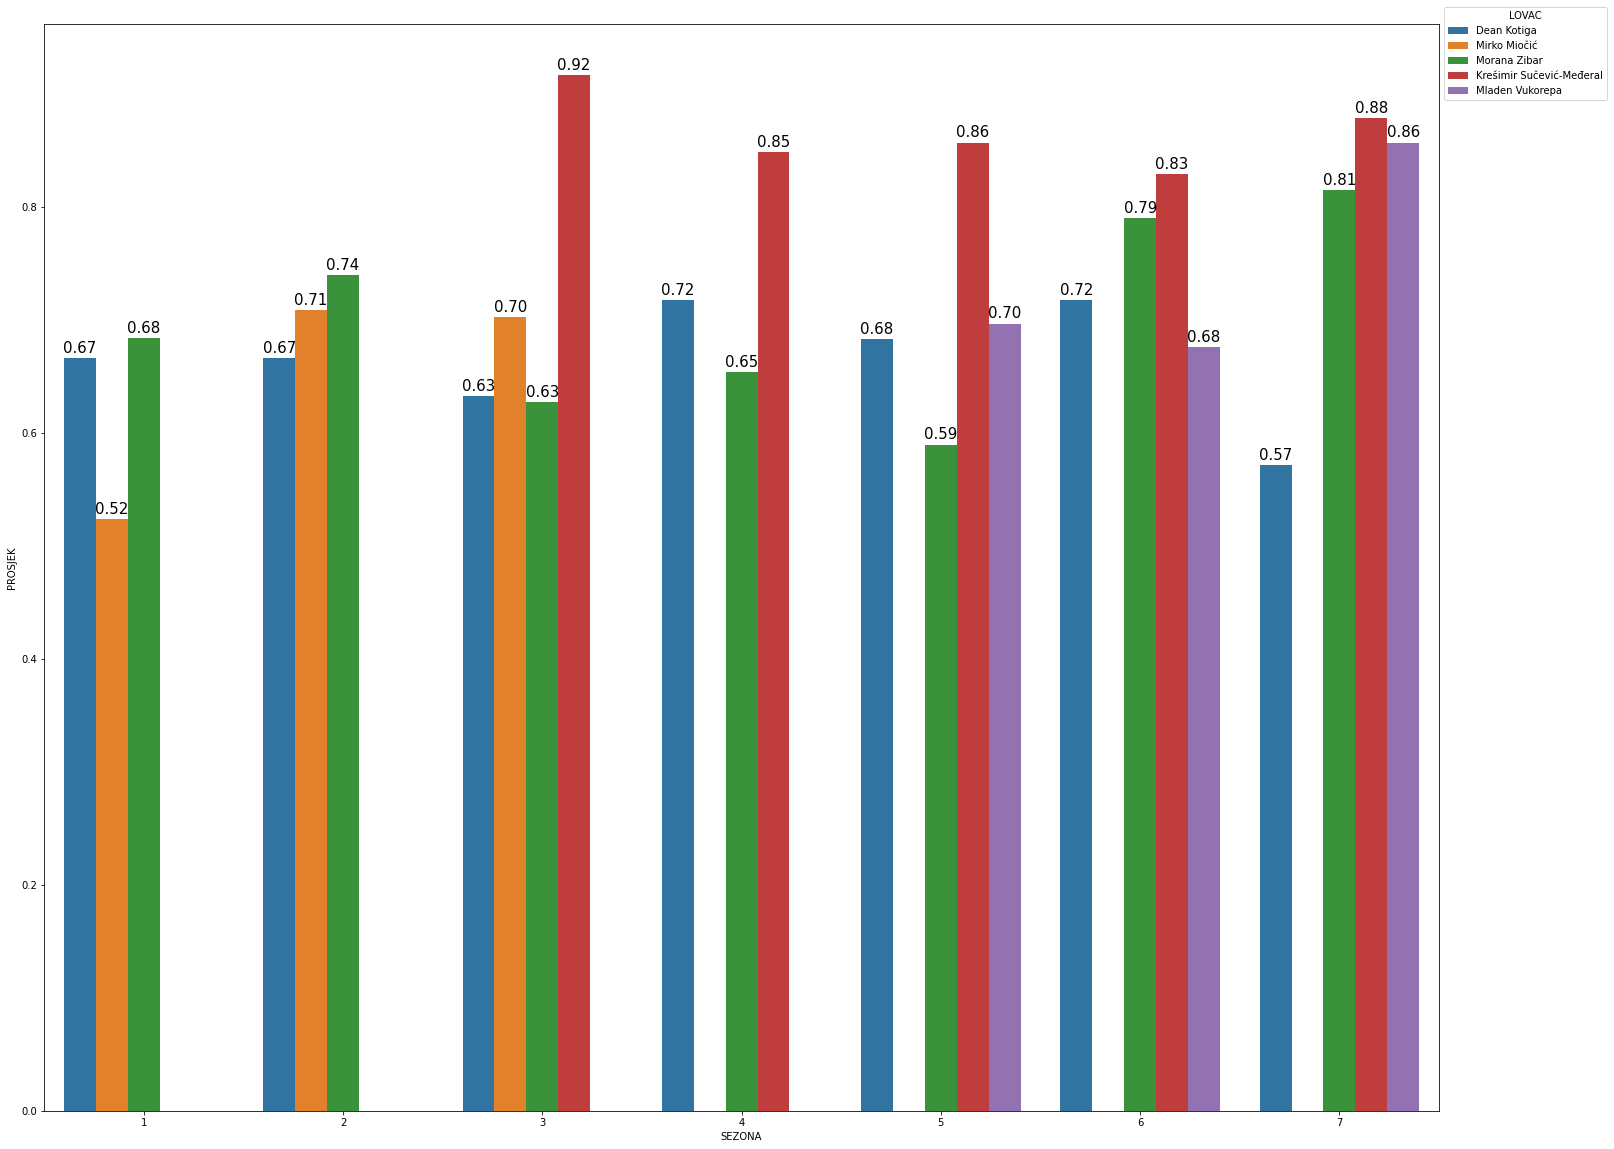

In [244]:
plt.rcParams["figure.figsize"] = (25,20)
p = sns.barplot(x=postotak_pobjede_po_sezonama.SEZONA, y=postotak_pobjede_po_sezonama.PROSJEK, hue=postotak_pobjede_po_sezonama.LOVAC, order=[1,2,3,4,5,6,7])
plt.rcParams["figure.figsize"] = (6,6)
sns.move_legend(p, bbox_to_anchor=(1, 1.02), loc='upper left')

for plot in p.patches:
    p.annotate(format(plot.get_height(),'.2f'),
                   (plot.get_x() + plot.get_width() / 2., plot.get_height()),
                   ha = 'center', va = 'center',
                   size=15,
                   xytext = (0, 10),
                   textcoords = 'offset points')

Kao što se moglo vidjeti iz grafa najveću uspješnost u emisiji je postigao Krešimir u 3. sezoni i ona je iznosila čak
91.67%. Iz tablice ispod vidimo da je od 12 epizoda u kojima je sudjelovao u 3. sezoni pobjedio u njih 11.

In [245]:
postotak_pobjede_po_sezonama[postotak_pobjede_po_sezonama['PROSJEK']==postotak_pobjede_po_sezonama['PROSJEK'].max()]

,SEZONA,LOVAC,PROSJEK
7,3,Krešimir Sučević-Međeral,0.916667


Lovac s najnižom uspješnosti u svim sezonam je Mirko. U 1. sezoni postigao je uspješnost od 52.38%, odnosno od 21 epizode
u kojoj je sudjelovao pobijedio je u 11 njih.

In [246]:
postotak_pobjede_po_sezonama[postotak_pobjede_po_sezonama['PROSJEK']==postotak_pobjede_po_sezonama['PROSJEK'].min()]

,SEZONA,LOVAC,PROSJEK
1,1,Mirko Miočić,0.52381


In [247]:
lovci_pobjeda_po_sezonama2 = pd.crosstab(data['SEZONA'],[data['LOVAC'], data['POBJEDNIK']])
lovci_pobjeda_po_sezonama2

LOVAC     Dean Kotiga       Krešimir Sučević-Međeral       Mirko Miočić        \
POBJEDNIK       EKIPA LOVAC                    EKIPA LOVAC        EKIPA LOVAC   
SEZONA                                                                          
1                   7    14                        0     0           10    11   
2                  18    36                        0     0           16    39   
3                  18    31                        1    11           11    26   
4                  13    33                        8    45            0     0   
5                  13    28                        5    30            0     0   
6                  11    28                        7    34            0     0   
7                  12    16                        4    29            0     0   

LOVAC     Mladen Vukorepa       Morana Zibar        
POBJEDNIK           EKIPA LOVAC        EKIPA LOVAC  
SEZONA                                              
1                       0     0            6    13  
2                       0     0           13    37  
3                       0     0           19    32  
4                       0     0           18    34  
5                      10    23           16    23  
6                      11    23            9    34  
7                       4    24            5    22

Budući da je Krešimir ostvario najveći ukupni postotak pobjeda u cijeloj emisiji u 3. sezoni, odnosno u baš onoj sezoni u
kojoj najmanje sudjeluje, postavlja se pitanje je li produkcija namjerno stavljala Krešimira manji broj puta kako bi zadržala
novce i kako bi emisija sačuvala napetost.


Analizirajući podatke o epizodama dobivamo informaciju da 3. sezona počinje s 221 epizodom.

In [248]:
data[data['SEZONA']==3]['EPIZODA'].min()

221

Isto tako završava s 369 epizodom.

In [249]:
data[data['SEZONA']==3]['EPIZODA'].max()

369

Ako se ispišu sve epizode u kojima Krešimir sudjeluje u 3. sezoni zaključuje se da se Krešimir priključuje Potjeri
tek od sredine 3. sezone i da ga od tada produkcija ravnomjerno raspoređuje po epizodama kao i druge lovce. Teza
da ga produkcija namjerno izbjegava da sačuvaju novac pada u vodu.

In [250]:
list(data[(data['LOVAC']=='Krešimir Sučević-Međeral') & (data['SEZONA']==3)]['EPIZODA'])

[337, 339, 341, 344, 349, 351, 355, 358, 360, 362, 365, 369]

Definiranjem fukcije koja računa broj pobjeda ekipe, broj pobjeda lovca, prosjek pobjede lovca i prosječan iznos
novaca kojeg igrači osvoje pred pločama i njenom primjenom na podatkovni skup ovisno o broju igrača koji čine ekipu i ovisno
o lovcu dobije se prikazana tablica. Sama tablica sadrži veliki broj informacija koje se će poslije posebno sagledati.
Iz tablice na jednom mjestu možemo usporediti rezulate ovisno o broju igrača i lovcu.

In [251]:
def f(x):
    d = {}
    d['EKIPA_REZ']=(x['POBJEDNIK']=='EKIPA').sum()
    d['LOVAC_REZ']=(x['POBJEDNIK']=='LOVAC').sum()
    d['PROSJEK_POBJEDE_LOVCA']=((x['POBJEDNIK']=='LOVAC').sum()/len(x))
    d['PROSJEK_NOVCA'] = x['NOVAC'].sum()/len(x)
    return pd.Series(d, index=['EKIPA_REZ', 'LOVAC_REZ', 'PROSJEK_POBJEDE_LOVCA', 'PROSJEK_NOVCA'])

data.groupby(['EKIPA_BR','LOVAC']).apply(f)
df_ovisnot_o_broju_igraca=pd.DataFrame(data.groupby(['EKIPA_BR','LOVAC']).apply(f))

In [252]:
df_ovisnot_o_broju_igraca

EKIPA_REZ  LOVAC_REZ  \
EKIPA_BR LOVAC                                            
1.0      Dean Kotiga                    11.0       29.0   
         Krešimir Sučević-Međeral        1.0       32.0   
         Mirko Miočić                    0.0       14.0   
         Mladen Vukorepa                 0.0       19.0   
         Morana Zibar                    4.0       26.0   
2.0      Dean Kotiga                    20.0       57.0   
         Krešimir Sučević-Međeral        7.0       52.0   
         Mirko Miočić                    5.0       24.0   
         Mladen Vukorepa                 7.0       30.0   
         Morana Zibar                   20.0       74.0   
3.0      Dean Kotiga                    36.0       45.0   
         Krešimir Sučević-Međeral        7.0       29.0   
         Mirko Miočić                   13.0       16.0   
         Mladen Vukorepa                14.0       16.0   
         Morana Zibar                   28.0       40.0   
4.0      Dean Kotiga                    16.0       13.0   
         Krešimir Sučević-Međeral        7.0       15.0   
         Mirko Miočić                    6.0        3.0   
         Mladen Vukorepa                 4.0        5.0   
         Morana Zibar                   19.0       12.0   

                                   PROSJEK_POBJEDE_LOVCA  PROSJEK_NOVCA  
EKIPA_BR LOVAC                                                           
1.0      Dean Kotiga                            0.725000   38093.750000  
         Krešimir Sučević-Međeral               0.969697   32969.696970  
         Mirko Miočić                           1.000000   23439.285714  
         Mladen Vukorepa                        1.000000   46250.000000  
         Morana Zibar                           0.866667   37233.333333  
2.0      Dean Kotiga                            0.740260   65337.662338  
         Krešimir Sučević-Međeral               0.881356   74457.627119  
         Mirko Miočić                           0.827586   53534.482759  
         Mladen Vukorepa                        0.810811   73824.324324  
         Morana Zibar                           0.787234   62574.468085  
3.0      Dean Kotiga                            0.555556   93711.246914  
         Krešimir Sučević-Međeral               0.805556  100708.361111  
         Mirko Miočić                           0.551724   74296.931034  
         Mladen Vukorepa                        0.533333  100866.666667  
         Morana Zibar                           0.588235   78029.411765  
4.0      Dean Kotiga                            0.448276  117114.000000  
         Krešimir Sučević-Međeral               0.681818   96997.727273  
         Mirko Miočić                           0.333333   99055.444444  
         Mladen Vukorepa                        0.555556  118055.555556  
         Morana Zibar                           0.387097  109951.612903

In [253]:
data.groupby(['LOVAC','EKIPA_BR']).apply(f)

EKIPA_REZ  LOVAC_REZ  \
LOVAC                    EKIPA_BR                         
Dean Kotiga              1.0            11.0       29.0   
                         2.0            20.0       57.0   
                         3.0            36.0       45.0   
                         4.0            16.0       13.0   
Krešimir Sučević-Međeral 1.0             1.0       32.0   
                         2.0             7.0       52.0   
                         3.0             7.0       29.0   
                         4.0             7.0       15.0   
Mirko Miočić             1.0             0.0       14.0   
                         2.0             5.0       24.0   
                         3.0            13.0       16.0   
                         4.0             6.0        3.0   
Mladen Vukorepa          1.0             0.0       19.0   
                         2.0             7.0       30.0   
                         3.0            14.0       16.0   
                         4.0             4.0        5.0   
Morana Zibar             1.0             4.0       26.0   
                         2.0            20.0       74.0   
                         3.0            28.0       40.0   
                         4.0            19.0       12.0   

                                   PROSJEK_POBJEDE_LOVCA  PROSJEK_NOVCA  
LOVAC                    EKIPA_BR                                        
Dean Kotiga              1.0                    0.725000   38093.750000  
                         2.0                    0.740260   65337.662338  
                         3.0                    0.555556   93711.246914  
                         4.0                    0.448276  117114.000000  
Krešimir Sučević-Međeral 1.0                    0.969697   32969.696970  
                         2.0                    0.881356   74457.627119  
                         3.0                    0.805556  100708.361111  
                         4.0                    0.681818   96997.727273  
Mirko Miočić             1.0                    1.000000   23439.285714  
                         2.0                    0.827586   53534.482759  
                         3.0                    0.551724   74296.931034  
                         4.0                    0.333333   99055.444444  
Mladen Vukorepa          1.0                    1.000000   46250.000000  
                         2.0                    0.810811   73824.324324  
                         3.0                    0.533333  100866.666667  
                         4.0                    0.555556  118055.555556  
Morana Zibar             1.0                    0.866667   37233.333333  
                         2.0                    0.787234   62574.468085  
                         3.0                    0.588235   78029.411765  
                         4.0                    0.387097  109951.612903

Izdvojimo li samo uspješnost lovaca o broju igrača ekipe dobiva se sljedeći tablični prikaz.

In [254]:
postotak_pobjede_po_broju_ekipe=pd.DataFrame(data.groupby(['EKIPA_BR','LOVAC']).apply(lambda x: (x['POBJEDNIK']=='LOVAC').sum()/len(x)).reset_index(name='PROSJEK'))
postotak_pobjede_po_broju_ekipe

,EKIPA_BR,LOVAC,PROSJEK
0,1.0,Dean Kotiga,0.725000
1,1.0,Krešimir Sučević-Međeral,0.969697
2,1.0,Mirko Miočić,1.000000
3,1.0,Mladen Vukorepa,1.000000
4,1.0,Morana Zibar,0.866667
5,2.0,Dean Kotiga,0.740260
6,2.0,Krešimir Sučević-Međeral,0.881356
7,2.0,Mirko Miočić,0.827586
8,2.0,Mladen Vukorepa,0.810811
9,2.0,Morana Zibar,0.787234


Krešimir je opet najuspješniji lovac ovisno o broju igrača u ekipi osim u slučaju kada se ekipa sastoji od jednog igrača gdje je od
ukupno 33 igre izgubio u jednoj i time dobio uspješnost od 96.96% što je manje od 100% što su osvojili Mirko i Mladen
za jednog igrača pobjedivši redom 14 i 19 igrača. Dean ima bolju uspješnost od 74.02% kada igra
protiv dva igrača od uspješnost kada igra protiv jednog igrača koja iznosi 72.5%. Mladen također ima bolju uspješnost od 55.55% kada igra
protiv četiri igrača nego kada igra protiv tri igrača jer mu je tada uspješnost 53.33%. Ostalim lovcima uspješnost
opada s porastom broja igrača u ekipi. Najizraženiji pad je vidljiv kod Mirka.


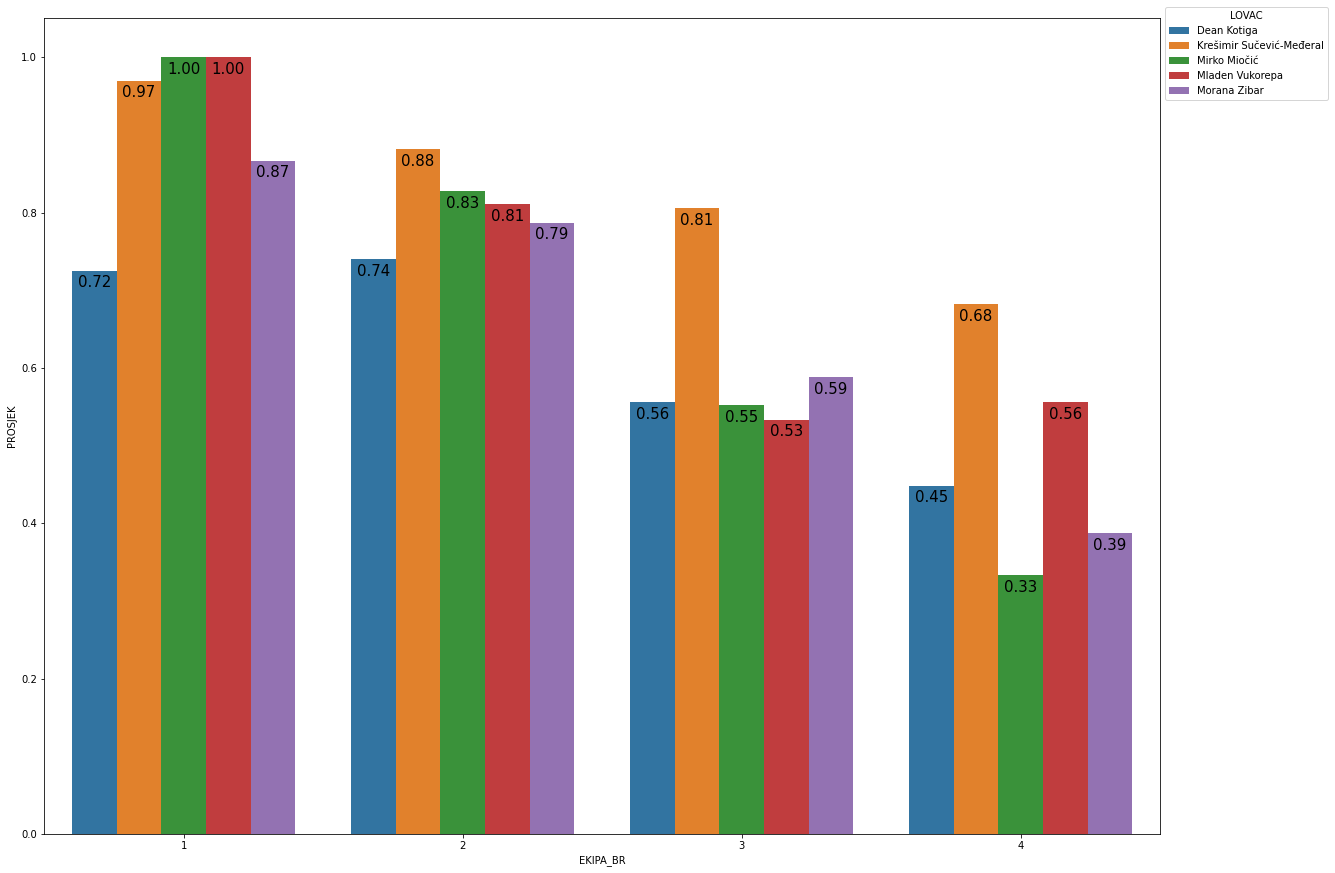

In [255]:
plt.rcParams["figure.figsize"] = (20,15)
p = sns.barplot(x=postotak_pobjede_po_broju_ekipe.EKIPA_BR, y=postotak_pobjede_po_broju_ekipe.PROSJEK, hue=postotak_pobjede_po_broju_ekipe.LOVAC, order=[1,2,3,4])
sns.move_legend(p, bbox_to_anchor=(1, 1.02), loc='upper left')
plt.rcParams["figure.figsize"] = (6,6)

for plot in p.patches:
    p.annotate(format(plot.get_height(),'.2f'),
                   (plot.get_x() + plot.get_width() / 2., plot.get_height()),
                   ha = 'center', va = 'center',
                   size=15,
                   xytext = (0, -12),
                   textcoords = 'offset points')
#for index, row in postotak_pobjede_po_broju_ekipe.iterrows():
#   p.text(row.EKIPA_BR,row.LOVAC, round(row.PROSJEK,2), color='black', ha="center")

Ovisnost novaca o broju članova ekipe i o lovcu vidljiva je u tablici. Iznosi se prosječno kreću od 23 000 kuna za jednog igrača do
118 000 kuna za četiri igrača.

In [256]:
novac_po_broju_ekipe=pd.DataFrame(data.groupby(['EKIPA_BR','LOVAC']).apply(lambda x: x['NOVAC'].sum()/len(x)).reset_index(name='NOVAC'))
novac_po_broju_ekipe

,EKIPA_BR,LOVAC,NOVAC
0,1.0,Dean Kotiga,38093.750000
1,1.0,Krešimir Sučević-Međeral,32969.696970
2,1.0,Mirko Miočić,23439.285714
3,1.0,Mladen Vukorepa,46250.000000
4,1.0,Morana Zibar,37233.333333
5,2.0,Dean Kotiga,65337.662338
6,2.0,Krešimir Sučević-Međeral,74457.627119
7,2.0,Mirko Miočić,53534.482759
8,2.0,Mladen Vukorepa,73824.324324
9,2.0,Morana Zibar,62574.468085


Osim što u tri od četiri ploče Mladen prosječno nudi najviše novaca ispostavilo se da i po broju članova ekipe novac
koji Mladen ponudi je veći od ostalih lovaca za tri slučaja od četiri. Kada je broj natjecatelja u ekipi 2 Krešimir
ima prosječno najveći iznos. Ukupan najveći iznos s obzirom na broj članova ekipe je 118 055 kuna kod Mladena.
Grafički vidimo da za svakoga lovca iznos novaca raste s obzirom na broj igrača ekipe.

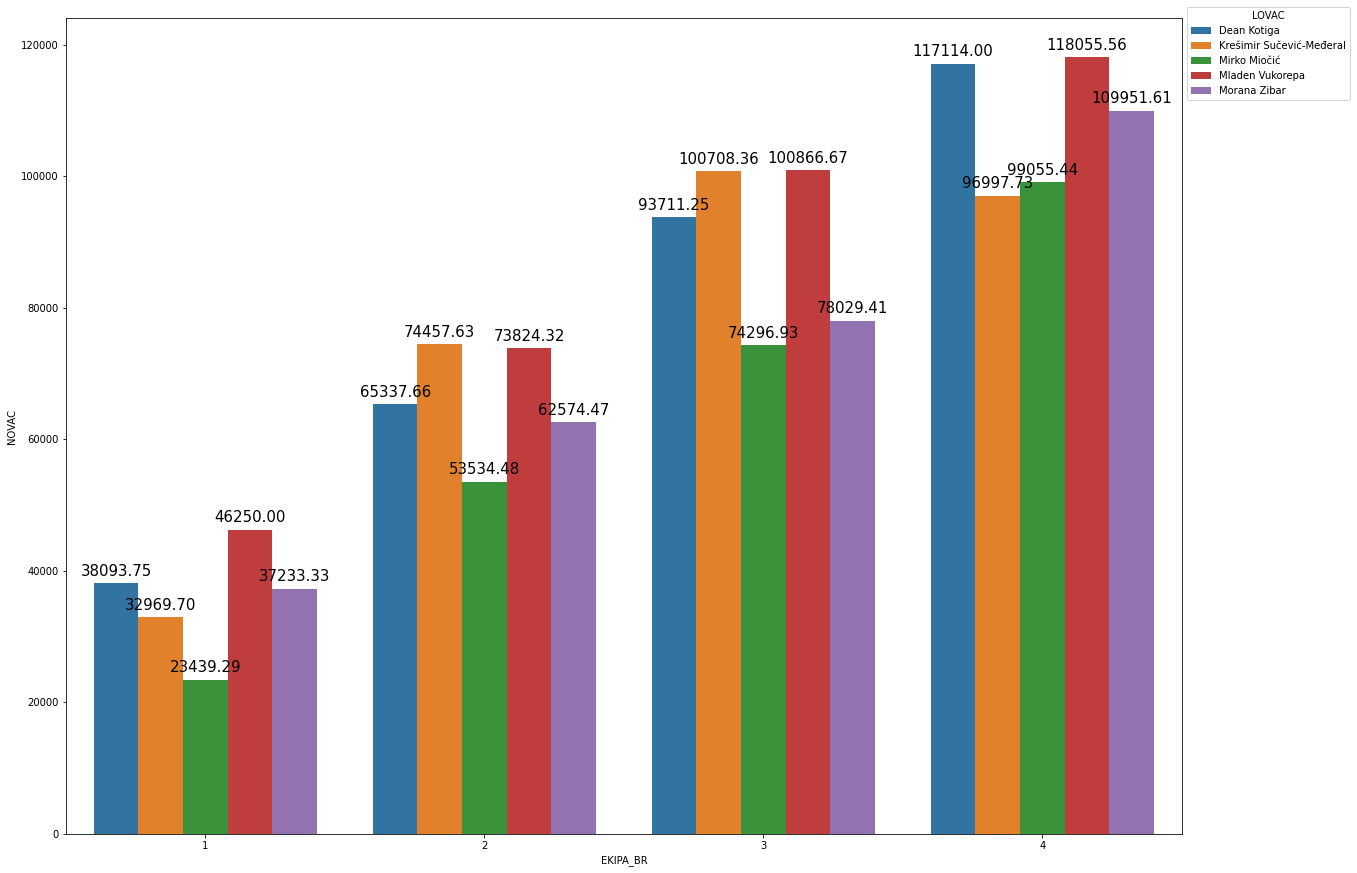

In [257]:
plt.rcParams["figure.figsize"] = (20,15)
p = sns.barplot(x=novac_po_broju_ekipe.EKIPA_BR, y=novac_po_broju_ekipe.NOVAC, hue=novac_po_broju_ekipe.LOVAC, order=[1,2,3,4])
sns.move_legend(p, bbox_to_anchor=(1, 1.02), loc='upper left')
plt.rcParams["figure.figsize"] = (6,6)

for plot in p.patches:
    p.annotate(format(plot.get_height(),'.2f'),
                   (plot.get_x() + plot.get_width() / 2., plot.get_height()),
                   ha = 'center', va = 'center',
                   size=15,
                   xytext = (0, 12),
                   textcoords = 'offset points')

Kad lovac izgubi znači da u roku od 120 sekunde nije uspio sakupiti jednaki broj točnih odgovora kao što ekipa ima koraka.
 Analizom vremena kada lovac pobjedi možemo ustvrditi tko je najbrži odnosno kojem je lovcu ostalo prosječno najviše vremena
 po epizodi u kojoj je pobijedio. Mladen i Krešimir su najbrži lovci kojima prosječno ostane 32 sekunde do isteka vremena po epizodi prije nego sustignu ekipu.


In [258]:
data.groupby(['POBJEDNIK']).get_group(('LOVAC')).groupby(['LOVAC']).apply(lambda x: x['VRIJEME'].sum()/len(x))

LOVAC
Dean Kotiga                 24.010753
Krešimir Sučević-Međeral    32.275168
Mirko Miočić                29.631579
Mladen Vukorepa             32.928571
Morana Zibar                29.015385
dtype: float64

Treba biti oprezan jer ako se uzmu u obzir sve epizode i u kojima su lovci pobijedili i izgubili dobivaju se drugačiji rezultati. Ovoga puta Krešimir ima
bolje rezultate od Mladena. Mladen je kažnjen s činjenicom da je sudjelovao veći broj puta od Krešimira i time si povećao ukupan
broj epizoda s kojim se ukupno vrijeme dijeli. Ovoga puta 27 sekundi predstavlja prosječan broj sekunda po epizodi koji ostanu Krešimiru.

In [259]:
data.groupby(['LOVAC']).apply(lambda x: x['VRIJEME'].sum()/len(x))

LOVAC
Dean Kotiga                 16.064748
Krešimir Sučević-Međeral    27.637931
Mirko Miočić                19.929204
Mladen Vukorepa             24.263158
Morana Zibar                20.135231
dtype: float64

Lovci su ukupno sačuvali 44 702 262 kune produkciji HRT-a.

In [260]:
sacuvani_novac=data.groupby(['POBJEDNIK']).get_group('LOVAC')['NOVAC'].sum()
sacuvani_novac

44702262.0

Ali su isto tako prepustili 22 160 866 kuna u ruke natjecatelja.

In [261]:
data.groupby(['POBJEDNIK']).get_group('EKIPA')['NOVAC'].sum()

22160866.0

Od ukupnog novca koji se protekao u emisijama 66.86% je ostalo HRT-u.

In [262]:
sacuvani_novac/uk_novac

0.6685637261840337

Uzmu li se u obzir samo pobjede lovaca i pozbroji li se novac iz tih emisija dobiju se iznosi koliko je koji lovac uspio sačuvati novaca.
 Dean Kotiga je najviše sačuvao, čak 12 516 750 kuna.

In [263]:
data.groupby(['POBJEDNIK']).get_group(('LOVAC')).groupby(['LOVAC']).apply(lambda x: x['NOVAC'].sum())

LOVAC
Dean Kotiga                 12516750.0
Krešimir Sučević-Međeral    10962001.0
Mirko Miočić                 4033761.0
Mladen Vukorepa              5354750.0
Morana Zibar                11835000.0
dtype: float64

Udio sačuvanih novaca po lovcu može se iščitati i iz strukturnog kruga.

Text(0.5, 1.0, 'Udio novaca koje je lovac sačuvao u emisiji')

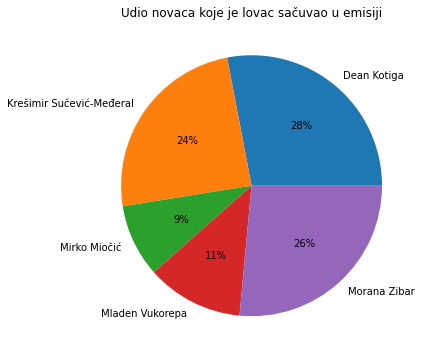

In [264]:
labels=data.groupby(['POBJEDNIK']).get_group('LOVAC').groupby(['LOVAC'])['NOVAC'].sum().index.tolist()
plt.pie(data.groupby(['POBJEDNIK']).get_group(('LOVAC')).groupby(['LOVAC']).apply(lambda x: x['NOVAC'].sum()),labels=labels,autopct='%i%%')
plt.title('Udio novaca koje je lovac sačuvao u emisiji')

Također se može doći do podatka koliko je ukupno svaki lovac novaca izgubio u emisiji. Dean je najviše novaca prepustio natjecateljima.

In [265]:
data.groupby(['POBJEDNIK']).get_group(('EKIPA')).groupby(['LOVAC']).apply(lambda x: x['NOVAC'].sum())

LOVAC
Dean Kotiga                 8431417.0
Krešimir Sučević-Međeral    2098450.0
Mirko Miočić                2285999.0
Mladen Vukorepa             2344000.0
Morana Zibar                7001000.0
dtype: float64

Text(0.5, 1.0, 'Udio novaca koje je lovac izgubio u emisiji')

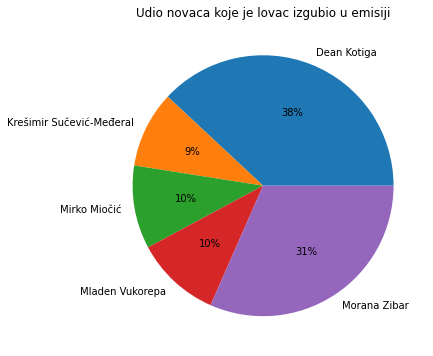

In [266]:
labels=data.groupby(['POBJEDNIK']).get_group('EKIPA').groupby(['LOVAC'])['NOVAC'].sum().index.tolist()
plt.pie(data.groupby(['POBJEDNIK']).get_group(('EKIPA')).groupby(['LOVAC']).apply(lambda x: x['NOVAC'].sum()),labels=labels,autopct='%i%%')
plt.title('Udio novaca koje je lovac izgubio u emisiji')

Zbog neravnomjerne raspodjele lovaca po epizodama, računajući koliko u prosjeku lovci sačuvaju novaca po epizodi Mladen dobiva
najbolje rezultate.

In [267]:
data.groupby(['POBJEDNIK']).get_group(('LOVAC')).groupby(['LOVAC']).apply(lambda x: x['NOVAC'].sum()/len(x))

LOVAC
Dean Kotiga                 67294.354839
Krešimir Sučević-Međeral    73570.476510
Mirko Miočić                53075.802632
Mladen Vukorepa             76496.428571
Morana Zibar                60692.307692
dtype: float64

Ali Mladen i prosječno gubi najviše novaca po epizodi.

In [268]:
data.groupby(['POBJEDNIK']).get_group(('EKIPA')).groupby(['LOVAC']).apply(lambda x: x['NOVAC'].sum()/len(x))

LOVAC
Dean Kotiga                 91645.836957
Krešimir Sučević-Međeral    83938.000000
Mirko Miočić                61783.756757
Mladen Vukorepa             93760.000000
Morana Zibar                81406.976744
dtype: float64

Zanima nas i koliko lovac prosječno nudi novaca natjecateljima po epizodi gdje je Mladen opet u vrhu. Upravo zbog ove
činjenice je Mladen lovac koji prosječno najviše novaca sačuva, ali i lovac koji najviše novaca izgubi. Uzme li se
u obzir uspješnost Mladena on je u samome vrhu točnije drugi lovac po uspješnosti s 73.68 % pobjeda. Kada bi Mladen
smanjio količinu novaca koji nudi natjecateljima puno više bi novaca sačuvao produkciji i time što se tiče novaca bio bi
uspješniji.

In [269]:
data.groupby(['LOVAC']).apply(lambda x: x['NOVAC'].sum()/len(x))

LOVAC
Dean Kotiga                 75353.118705
Krešimir Sučević-Međeral    75060.063218
Mirko Miočić                55927.079646
Mladen Vukorepa             81039.473684
Morana Zibar                67032.028470
dtype: float64

U završnoj potjeri za svakog lovca se izračunalo koliko svaki natjecatelj prosječno vrijedi, odnosno koliko bi novaca
ako pobjedi odnio kući. Vidimo da natjecatelji Deana Kotige vrijede najviše i to 37 880 kuna.

In [270]:
data.groupby(['LOVAC']).apply(lambda x: x['NOVAC'].sum()/x['EKIPA_BR'].sum())


LOVAC
Dean Kotiga                 37880.952984
Krešimir Sučević-Međeral    37638.187320
Mirko Miočić                32409.025641
Mladen Vukorepa             35154.109589
Morana Zibar                34498.168498
dtype: float64

Po iznosu novaca koje lovac sačuva u emisijama Krešimir ispada najbolji lovac s 83.39% sačuvanog novca.

In [271]:
data_with_money_values = data[data['NOVAC'].notnull()]
data_with_money_values.groupby(['LOVAC']).apply(lambda x: x[x['POBJEDNIK']=='LOVAC']['NOVAC'].sum()/sum(x['NOVAC']))

LOVAC
Dean Kotiga                 0.597511
Krešimir Sučević-Međeral    0.839328
Mirko Miočić                0.638278
Mladen Vukorepa             0.695535
Morana Zibar                0.628318
dtype: float64

Najveći iznos koji je ekipa osvojila na potjeri iznosi 250 000 kuna. Ekipa koja se sastojala od 3 natjecatelja igrala je
protiv Deana Kotige od kojeg ih je dijelio jedan korak.


In [272]:
data[data['NOVAC']==data.groupby(['POBJEDNIK']).get_group(('EKIPA'))['NOVAC'].max()]

,SEZONA,EPIZODA,LOVAC,PLOCA1,PLOCA2,PLOCA3,PLOCA4,NOVAC,EKIPA_BR,EKIPA_REZ,LOVAC_REZ,VRIJEME,POBJEDNIK,LOVAC_POBJEDA
174,2,175,Dean Kotiga,80000,70000,100000,Izgubio,250000.0,3.0,16.0,15.0,0.0,EKIPA,0


Najveći iznos koji je osvoji jedan natjecatelj iznosi 135 000 kuna.

In [273]:
data[(data['POBJEDNIK'] == 'EKIPA') & (data['EKIPA_BR']==1)]['NOVAC'].max()

135000.0

Najmanji iznos koji je ekipa osvojila je 7 000 kuna. Natjecatelj je za 3 koraka bio dalje od Deana Kotige.

In [274]:
data[(data['POBJEDNIK'] == 'EKIPA') & (data['NOVAC']==data.groupby(['POBJEDNIK']).get_group(('EKIPA'))['NOVAC'].min())]

,SEZONA,EPIZODA,LOVAC,PLOCA1,PLOCA2,PLOCA3,PLOCA4,NOVAC,EKIPA_BR,EKIPA_REZ,LOVAC_REZ,VRIJEME,POBJEDNIK,LOVAC_POBJEDA
479,4,480,Dean Kotiga,Izgubio,Izgubio,Izgubio,7000,7000.0,1.0,9.0,6.0,0.0,EKIPA,0


**LOVAC_POBJEDA** sarži binarne vrijednosti 0 i 1 ovisno o porazu ili pobjedi lovca.

In [275]:
list(data['LOVAC_POBJEDA'].unique())

[1, 0]

Svi su podatci su sadržani u podatkovnom skupu.


In [276]:
data['LOVAC_POBJEDA'].isnull().sum()

0

Vrijednost 1 stupca LOVAC_POBJEDA označava da je pobjednik lovac.

In [277]:
(data[data['LOVAC_POBJEDA']==1]['POBJEDNIK']).unique()

array(['LOVAC'], dtype=object)

Vrijednost 0 označava da je ekipa pobjednik.

In [278]:
(data[data['LOVAC_POBJEDA']==0]['POBJEDNIK']).unique()

array(['EKIPA'], dtype=object)

Stupac LOVAC_POBJEDA i POBJEDNIK sadrže redundantne podatke stoga stupac POBJEDNIK se može u potpunosti obrisati iz podatkovnog
skupa bez gubitka podataka.

In [279]:
data = data.drop(['POBJEDNIK'], axis=1)
data.head(5)

,SEZONA,EPIZODA,LOVAC,PLOCA1,PLOCA2,PLOCA3,PLOCA4,NOVAC,EKIPA_BR,EKIPA_REZ,LOVAC_REZ,VRIJEME,LOVAC_POBJEDA
0,1,1,Dean Kotiga,Izgubio,35000,10000,Izgubio,45000.0,2.0,14.0,14.0,10.0,1
1,1,2,Morana Zibar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
2,1,3,Dean Kotiga,NaN,NaN,Izgubio,Izgubio,3500.0,2.0,9.0,9.0,1.0,1
3,1,4,Mirko Miočić,NaN,NaN,Izgubio,NaN,NaN,NaN,NaN,NaN,0.0,0
4,1,5,Mirko Miočić,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0


Podatkovni skup sadrži mnogo zanimljivih činjenica i podataka koji se mogu dobiti analizirajući ga. Proučavajući podatke
o lovcima došlo se do zaključaka da je:
- Morana sudjelovala u najviše epizoda
- Morana sačuvala najveći iznos ekipe
- Mladen točno odgovorio na najviše pitanja u završnoj potjeri
- Krešimir prosječno odgovarao točno na najviše pitanja,
- Krešimir postigao najviši postotak pobjeda po epizodama
- Mladenu ostajalo najviše vremena po epizodama u kojima je pobijedio
- Krešimir sačuvao najveći postotak novaca kroz emisije.
- Mladen prosječno nudi najviše novaca natjecateljima
- Mladen prosječno najčešće nudi najviše novaca svakom od natjecatelja
- Mladen prosječno gubi najviše novaca od strane natjecatelja
- Krešimir bio najuspješniji lovac u svakoj od sezona u kojoj je sudjelovao
- Krešimir prosječno najuspješniji i s obzirom na broj igrača u ekipi

S najvećim postotkom pobjeda i s prosječno najviše sačuvanog novca Krešimir se može smatrati najuspješnijim lovcem potjere.


Zamislimo situaciju da se nađemo u poziciji prvog natjecatelja potjere koji je prošao u završnu potjeru, sljedeća dva
natjecatelja su ispala i pred pločom je četvrti natjecatelj. Na nama je da damo savjet četvrtom natjecatelju. Želimo imati najveću novačanu korist u tom slučaju. Što učiniti u tom pitanju. Postoje dva slučaja reći natjecatelju da uzme
višu ponudu i time računati da vjerovatno neće pobjediti lovca, ali u tom slučaju naša se zarada neće dijeliti na dva dijela ili
predložiti mu da uzme nižu vrijednost od nula kuna gdje bi kao dvoje natjecatelja imali veću vjerojatnost pobjede, ali bi
se naš iznos dijelio na dva dijela. Postavlja se pitanje što učiniti. Potrebno je izračunati očekivane monetarne
vrijednosti ovih slučajeva i odabrati onaj s većom zaradom.

EMV1 = vjerojatnost pobjede jednog igrača * prosječan broj novaca koji jedan igrač osvoji = 0.1176 * 36291.54 = 4,267.89 kune

EMV2 = vjerojatnost pobjede dvojice igrača * prosječan broj novaca koji jedan igrač osvoji podjeljeno na dva igrača 0.199324 * 36291.54 / 2 = 3,616.45

Usporedbom monetarnih vrijednosti veću vrijednost dobiva slučaj kada predložimo igraču da ide na višu ponudu jer je slučaj
da kada ostanemo sami isplativiji pa nam je zapravo svejedno hoće li igrač izgubiti ili će nam se pridružiti s višim iznosom
jer je u oba slučaja monetarna vrijednost veća od situacije da igrač prihvati nula kuna i pobjedi lovca i time podijeli naš
zarađeni iznos.


